## Dataset CSV

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [4]:
df = pd.read_csv('dataset/characters.csv')
df

name  height mass hair_color   skin_color eye_color birth_year  \
0   Luke Skywalker   172.0   77      blond         fair      blue      19BBY   
1            C-3PO   167.0   75        NaN         gold    yellow     112BBY   
2            R2-D2    96.0   32        NaN  white, blue       red      33BBY   
3      Darth Vader   202.0  136       none        white    yellow    41.9BBY   
4      Leia Organa   150.0   49      brown        light     brown      19BBY   
..             ...     ...  ...        ...          ...       ...        ...   
82             Rey     NaN  NaN      brown        light     hazel        NaN   
83     Poe Dameron     NaN  NaN      brown        light     brown        NaN   
84             BB8     NaN  NaN       none         none     black        NaN   
85  Captain Phasma     NaN  NaN        NaN          NaN       NaN        NaN   
86   Padmé Amidala   165.0   45      brown        light     brown      46BBY   

    gender homeworld species  
0     male  Tatooine   Human  
1      NaN  Tatooine   Droid  
2      NaN     Naboo   Droid  
3     male  Tatooine   Human  
4   female  Alderaan   Human  
..     ...       ...     ...  
82  female       NaN   Human  
83    male       NaN   Human  
84    none       NaN   Droid  
85  female       NaN     NaN  
86  female     Naboo   Human  

[87 rows x 10 columns]

## Question-Answer dataset

In [5]:
df_q = pd.read_csv('dataset/question_answer.csv')
df_q

Q: What is Luke Skywalker's height?
0          A: Luke Skywalker's height is 172.
1           Q: What is Luke Skywalker's mass?
2             A: Luke Skywalker's mass is 77.
3     Q: What is Luke Skywalker's hair color?
4    A: Luke Skywalker's hair color is blond.
..                                        ...
232                  A: Chewbacca is Wookiee.
233             Q: What is Han Solo's height?
234              A: Han Solo's height is 180.
235               Q: What is Han Solo's mass?
236                     A: Han Solo's mass is

[237 rows x 1 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        87 non-null     object 
 1   height      81 non-null     float64
 2   mass        59 non-null     object 
 3   hair_color  81 non-null     object 
 4   skin_color  85 non-null     object 
 5   eye_color   84 non-null     object 
 6   birth_year  43 non-null     object 
 7   gender      84 non-null     object 
 8   homeworld   77 non-null     object 
 9   species     82 non-null     object 
dtypes: float64(1), object(9)
memory usage: 6.9+ KB


## Preprocess

In [7]:
cols = ['mass']
df = df.drop(cols, axis=1)

In [8]:
df

name  height hair_color   skin_color eye_color birth_year  \
0   Luke Skywalker   172.0      blond         fair      blue      19BBY   
1            C-3PO   167.0        NaN         gold    yellow     112BBY   
2            R2-D2    96.0        NaN  white, blue       red      33BBY   
3      Darth Vader   202.0       none        white    yellow    41.9BBY   
4      Leia Organa   150.0      brown        light     brown      19BBY   
..             ...     ...        ...          ...       ...        ...   
82             Rey     NaN      brown        light     hazel        NaN   
83     Poe Dameron     NaN      brown        light     brown        NaN   
84             BB8     NaN       none         none     black        NaN   
85  Captain Phasma     NaN        NaN          NaN       NaN        NaN   
86   Padmé Amidala   165.0      brown        light     brown      46BBY   

    gender homeworld species  
0     male  Tatooine   Human  
1      NaN  Tatooine   Droid  
2      NaN     Naboo   Droid  
3     male  Tatooine   Human  
4   female  Alderaan   Human  
..     ...       ...     ...  
82  female       NaN   Human  
83    male       NaN   Human  
84    none       NaN   Droid  
85  female       NaN     NaN  
86  female     Naboo   Human  

[87 rows x 9 columns]

In [9]:
df = df.dropna() # drop all rows in the data that have missing values(Nan)

In [10]:
df

name  height     hair_color    skin_color  eye_color  \
0          Luke Skywalker   172.0          blond          fair       blue   
3             Darth Vader   202.0           none         white     yellow   
4             Leia Organa   150.0          brown         light      brown   
5               Owen Lars   178.0    brown, grey         light       blue   
6      Beru Whitesun lars   165.0          brown         light       blue   
8       Biggs Darklighter   183.0          black         light      brown   
9          Obi-Wan Kenobi   182.0  auburn, white          fair  blue-gray   
10       Anakin Skywalker   188.0          blond          fair       blue   
11         Wilhuff Tarkin   180.0   auburn, grey          fair       blue   
13               Han Solo   180.0          brown          fair      brown   
16         Wedge Antilles   170.0          brown          fair      hazel   
19              Palpatine   170.0           grey          pale     yellow   
20              Boba Fett   183.0          black          fair      brown   
22                  Bossk   190.0           none         green        red   
23       Lando Calrissian   177.0          black          dark      brown   
24                  Lobot   175.0           none         light       blue   
25                 Ackbar   180.0           none  brown mottle     orange   
26             Mon Mothma   150.0         auburn          fair       blue   
28  Wicket Systri Warrick    88.0          brown         brown      brown   
32          Finis Valorum   170.0          blond          fair       blue   
33          Jar Jar Binks   196.0           none        orange     orange   
40         Shmi Skywalker   163.0          black          fair      brown   
41             Darth Maul   175.0           none           red     yellow   
43            Ayla Secura   178.0           none          blue      hazel   
47             Mace Windu   188.0           none          dark      brown   
48           Ki-Adi-Mundi   198.0          white          pale     yellow   
54               Plo Koon   188.0           none        orange      black   
58            Cliegg Lars   183.0          brown          fair       blue   
60        Luminara Unduli   170.0          black        yellow       blue   
61          Barriss Offee   166.0          black        yellow       blue   
63                  Dooku   193.0          white          fair      brown   
64    Bail Prestor Organa   191.0          black           tan      brown   
65             Jango Fett   183.0          black           tan      brown   
86          Padmé Amidala   165.0          brown         light      brown   

   birth_year  gender     homeworld       species  
0       19BBY    male      Tatooine         Human  
3     41.9BBY    male      Tatooine         Human  
4       19BBY  female      Alderaan         Human  
5       52BBY    male      Tatooine         Human  
6       47BBY  female      Tatooine         Human  
8       24BBY    male      Tatooine         Human  
9       57BBY    male       Stewjon         Human  
10    41.9BBY    male      Tatooine         Human  
11      64BBY    male        Eriadu         Human  
13      29BBY    male      Corellia         Human  
16      21BBY    male      Corellia         Human  
19      82BBY    male         Naboo         Human  
20    31.5BBY    male        Kamino         Human  
22      53BBY    male     Trandosha    Trandoshan  
23      31BBY    male       Socorro         Human  
24      37BBY    male        Bespin         Human  
25      41BBY    male      Mon Cala  Mon Calamari  
26      48BBY  female     Chandrila         Human  
28       8BBY    male         Endor          Ewok  
32      91BBY    male     Coruscant         Human  
33      52BBY    male         Naboo        Gungan  
40      72BBY  female      Tatooine         Human  
41      54BBY    male      Dathomir        Zabrak  
43      48BBY  female        Ryloth       Twi'lek  
47      72BBY    male    

## Data Splitting

In [11]:
import nltk
from sklearn.model_selection import train_test_split

# Assume you have a list of sentences as your corpus
corpus = ["I love NLP.", "This is a sentence.", "NLP is fun!"]

# Assume you have corresponding labels for each sentence
labels = ["positive", "neutral", "positive"]

# Split the data into train and test sets
corpus_train, corpus_test, labels_train, labels_test = train_test_split(corpus, labels, test_size=0.2, random_state=42)

# Now you have the training and testing data ready
print("Training Corpus:", corpus_train)
print("Training Labels:", labels_train)
print("Testing Corpus:", corpus_test)
print("Testing Labels:", labels_test)

Training Corpus: ['This is a sentence.', 'NLP is fun!']
Training Labels: ['neutral', 'positive']
Testing Corpus: ['I love NLP.']
Testing Labels: ['positive']


## Word2Vec

In [12]:
corpus_raw = 'He is the king . The king is royal . She is the royal  queen '
# convert to lower case
corpus_raw = corpus_raw.lower()

words = []
for word in corpus_raw.split():
    if word != '.': # because we don't want to treat . as a word
        words.append(word)

words = set(words) # so that all duplicate words are removed
word2int = {}
int2word = {}
vocab_size = len(words) # gives the total number of unique words

for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word

In [13]:
print(word2int['queen'])
print(int2word[6])

5
king


In [14]:
raw_sentences = corpus_raw.split('.')
sentences = []

for sentence in raw_sentences:
    sentences.append(sentence.split())

print(sentences)

[['he', 'is', 'the', 'king'], ['the', 'king', 'is', 'royal'], ['she', 'is', 'the', 'royal', 'queen']]


## Now, we will generate our training data:

In [15]:
data = []
WINDOW_SIZE = 2

for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(sentence)) + 1] : 
            if nb_word != word:
                data.append([word, nb_word])

## This basically gives a list of word, word pairs. (we are considering a window size of 2)

In [16]:
print(data)

[['he', 'is'], ['he', 'the'], ['is', 'he'], ['is', 'the'], ['is', 'king'], ['the', 'he'], ['the', 'is'], ['the', 'king'], ['king', 'is'], ['king', 'the'], ['the', 'king'], ['the', 'is'], ['king', 'the'], ['king', 'is'], ['king', 'royal'], ['is', 'the'], ['is', 'king'], ['is', 'royal'], ['royal', 'king'], ['royal', 'is'], ['she', 'is'], ['she', 'the'], ['is', 'she'], ['is', 'the'], ['is', 'royal'], ['the', 'she'], ['the', 'is'], ['the', 'royal'], ['the', 'queen'], ['royal', 'is'], ['royal', 'the'], ['royal', 'queen'], ['queen', 'the'], ['queen', 'royal']]


In [17]:
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp

## Convert these numbers into one hot vectors

In [18]:
x_train = [] # input word
y_train = [] # output word

for data_word in data:
    x_train.append(to_one_hot(word2int[ data_word[0] ], vocab_size))
    y_train.append(to_one_hot(word2int[ data_word[1] ], vocab_size))

# convert them to numpy arrays
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [19]:
print(x_train)

[[0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]]


## 34 training points, where each point has 7 dimensions

In [118]:
print(x_train.shape, y_train.shape)

(34, 7) (34, 7)


## training data into the embedded representation.
    - embedding_dim is a hyperparameter

In [112]:
# making placeholders for x_train and y_train
x = tf.keras.Input(shape=(vocab_size,), dtype=tf.float32)
y_label = tf.keras.Input(shape=(vocab_size,), dtype=tf.float32)
    
EMBEDDING_DIM = 5 # you can choose your own number
W1 = tf.Variable(tf.random.normal([vocab_size, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random.normal([EMBEDDING_DIM])) #bias
hidden_representation = tf.add(tf.matmul(x,W1), b1)

## we take what we have in the embedded dimension and make a prediction about the neighbour. To make the prediction we use softmaxm

In [113]:
W2 = tf.Variable(tf.random.normal([EMBEDDING_DIM, vocab_size]))
b2 = tf.Variable(tf.random.normal([vocab_size]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_representation, W2), b2))

# that’s left is to train it:

In [129]:
# Define the graph
graph = tf.Graph()
with graph.as_default():
    # Define the placeholders
    
    # Define the variables
    W1 = tf.Variable(tf.random.normal([vocab_size, EMBEDDING_DIM]))
    b1 = tf.Variable(tf.random.normal([EMBEDDING_DIM]))
    W2 = tf.Variable(tf.random.normal([EMBEDDING_DIM, vocab_size]))
    b2 = tf.Variable(tf.random.normal([vocab_size]))
    
    # making placeholders for x_train and y_train
    x = tf.keras.Input(shape=(vocab_size,), dtype=tf.float32)
    y_label = tf.keras.Input(shape=(vocab_size,), dtype=tf.float32)

    # Define the operations
    hidden_representation = tf.add(tf.matmul(x, W1), b1)
    prediction = tf.nn.softmax(tf.add(tf.matmul(hidden_representation, W2), b2))
    
    # Initialize the variables
    init = tf.compat.v1.global_variables_initializer()

# Create a TensorFlow session and run the initialization
with tf.compat.v1.Session(graph=graph) as sess:
    sess.run(init)
    cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.math.log(prediction), axis=1))

    # Define the training step
    optimizer = tf.compat.v1.train.GradientDescentOptimizer(0.1)
    train_step = optimizer.minimize(cross_entropy_loss)

    n_iters = 10000
    for _ in range(n_iters):
        feed_dict = {x: x_train, y_label: y_train}
        sess.run(train_step, feed_dict=feed_dict)

        # Display of loss
        print('loss is : ', sess.run(cross_entropy_loss, feed_dict={x: x_train, y_label: y_train}))
        
        # Hidden representations.
        print(sess.run(W1))
        print('----------')
        print(sess.run(b1))
        print('----------')

loss is :  3.034848
[[ 0.39281353 -0.67434436  0.1233495  -0.85376704 -0.49720183]
 [ 0.46085718 -0.18357466 -0.5469523  -1.5098919   0.6053981 ]
 [-0.23175088  0.60990363  0.522128    1.2661042   0.87817293]
 [ 2.7009695   0.76198375  1.7177792  -1.3790047  -2.4894314 ]
 [ 0.01327541  0.77013177 -1.5532919   0.31834888 -0.11335866]
 [-0.1103351  -1.1952826   1.0865031   0.0932262  -0.7343114 ]
 [-0.5403967   1.5034379  -0.26351413 -0.00310726  0.0466451 ]]
----------
[-0.21528134 -0.46854308  0.197478    1.1592269  -2.2667181 ]
----------
loss is :  2.931243
[[ 3.9441705e-01 -6.5456402e-01  1.1841797e-01 -8.4264672e-01
  -4.8612791e-01]
 [ 4.6975490e-01 -1.7374176e-01 -5.5780226e-01 -1.4922484e+00
   6.1278027e-01]
 [-2.2533581e-01  6.0290337e-01  5.1824474e-01  1.2627149e+00
   8.7749898e-01]
 [ 2.6939850e+00  7.5647283e-01  1.7175319e+00 -1.3791994e+00
  -2.4894967e+00]
 [ 1.4927182e-03  7.7553564e-01 -1.5455928e+00  3.1396204e-01
  -1.1179493e-01]
 [-1.0126061e-01 -1.1947557e+00  1

loss is :  1.7599299
[[ 0.1743873   0.19818011  0.19179668 -0.7082728   0.11204148]
 [ 0.44406396 -0.14155495 -0.47093716 -0.9254844   0.65980923]
 [-0.17604786  0.40284264  0.4333855   1.1046523   0.7071532 ]
 [ 2.382229    0.58988935  1.6956891  -1.3813615  -2.5525405 ]
 [-0.50903684  0.9876561  -1.1765422   0.09517529 -0.11176636]
 [ 0.3550149  -1.2340606   0.7529766   0.16610526 -0.7149519 ]
 [ 0.16098611  0.98181355 -0.4703755  -0.05876792 -0.06327746]]
----------
[-0.06911799 -0.2760319   0.06746946  1.5193652  -1.9261649 ]
----------
loss is :  1.7565142
[[ 0.17336541  0.20367044  0.19091319 -0.70872784  0.11833441]
 [ 0.4424121  -0.14431593 -0.46926594 -0.9223149   0.6583702 ]
 [-0.1763648   0.40200523  0.43303314  1.1036448   0.70512205]
 [ 2.3801458   0.5897744   1.6958357  -1.3813562  -2.5533428 ]
 [-0.5118774   0.9893769  -1.1747428   0.09364127 -0.11194591]
 [ 0.35891017 -1.2346656   0.75080454  0.16631761 -0.71445274]
 [ 0.16458946  0.97914517 -0.4705331  -0.05825505 -0.0

loss is :  1.5758152
[[ 0.10246135  0.4385365   0.09094503 -0.79571164  0.58532   ]
 [ 0.28386006 -0.45786235 -0.35934424 -0.7634615   0.56830776]
 [-0.18925491  0.39399317  0.41671303  1.0673451   0.56601995]
 [ 2.2621632   0.6355771   1.7189338  -1.381422   -2.6074731 ]
 [-0.6439094   1.1156312  -1.103347    0.02120618 -0.12742068]
 [ 0.60411644 -1.2951212   0.617328    0.18109335 -0.6749462 ]
 [ 0.34663823  0.8839892  -0.42469844 -0.01746905 -0.1829044 ]]
----------
[-0.13463871 -0.34605435  0.0680061   1.5388993  -1.8357289 ]
----------
loss is :  1.5744452
[[ 0.10146566  0.43902552  0.0898852  -0.797142    0.58987767]
 [ 0.28206155 -0.46168047 -0.35845962 -0.76255774  0.56787986]
 [-0.18927515  0.39452407  0.41668737  1.0673261   0.564715  ]
 [ 2.2614448   0.63636935  1.7191564  -1.3813511  -2.6079633 ]
 [-0.6446293   1.1168146  -1.1031631   0.0208363  -0.1276419 ]
 [ 0.6061534  -1.295849    0.61623126  0.1812605  -0.67457116]
 [ 0.34788808  0.8840268  -0.42381325 -0.01704065 -0.1

loss is :  1.4767385
[[-1.9222114e-02  3.8786489e-01  3.2423552e-02 -9.5406502e-01
   9.5974964e-01]
 [ 1.5782575e-01 -7.5845724e-01 -3.0944949e-01 -7.1007931e-01
   5.6800157e-01]
 [-1.8214019e-01  4.7346935e-01  4.2342466e-01  1.0863327e+00
   4.5542535e-01]
 [ 2.2270494e+00  6.9992507e-01  1.7319337e+00 -1.3681552e+00
  -2.6465833e+00]
 [-6.9461101e-01  1.1932639e+00 -1.1165559e+00  2.8122411e-04
  -1.5268488e-01]
 [ 7.5241834e-01 -1.3551862e+00  5.3998089e-01  1.9468549e-01
  -6.4726549e-01]
 [ 4.3893057e-01  9.2666960e-01 -3.4006086e-01  1.9030269e-02
  -2.6895761e-01]]
----------
[-0.2204631  -0.4932482   0.07317337  1.4953485  -1.6949464 ]
----------
loss is :  1.47589
[[-2.0726949e-02  3.8683298e-01  3.2293357e-02 -9.5599288e-01
   9.6354204e-01]
 [ 1.5692158e-01 -7.6113105e-01 -3.0920497e-01 -7.0959723e-01
   5.6821841e-01]
 [-1.8197949e-01  4.7454309e-01  4.2355841e-01  1.0867323e+00
   4.5423868e-01]
 [ 2.2268658e+00  7.0049161e-01  1.7320117e+00 -1.3679585e+00
  -2.6469755e

[-0.2682274  -0.59011924  0.1093229   1.4509786  -1.5687265 ]
----------
loss is :  1.4191418
[[-0.12744741  0.32253873  0.06818595 -1.1144508   1.268326  ]
 [ 0.09919865 -0.953745   -0.30533782 -0.661669    0.58050334]
 [-0.16435993  0.56785256  0.43478417  1.1331491   0.3481778 ]
 [ 2.2148776   0.73950654  1.7354159  -1.3486396  -2.681416  ]
 [-0.76300734  1.214613   -1.168982   -0.02650531 -0.17844275]
 [ 0.8575527  -1.4037244   0.49416888  0.19806261 -0.62290674]
 [ 0.5154302   0.9830336  -0.25985563  0.04338511 -0.31934622]]
----------
[-0.26846898 -0.5907229   0.10985636  1.4506501  -1.5677367 ]
----------
loss is :  1.4187407
[[-0.12813401  0.32227534  0.06893042 -1.1158042   1.2709332 ]
 [ 0.09872172 -0.955316   -0.3054433  -0.66115445  0.58053136]
 [-0.16417195  0.5687      0.43486905  1.1336906   0.34712833]
 [ 2.2147663   0.7398092   1.7354232  -1.3484343  -2.6817672 ]
 [-0.7638405   1.2146523  -1.1696057  -0.02686055 -0.17866175]
 [ 0.85848695 -1.4041653   0.49383265  0.198

loss is :  1.3956821
[[-0.16098145  0.31754947  0.12955453 -1.2014309   1.4305662 ]
 [ 0.06395651 -1.0580692  -0.31859067 -0.62454665  0.5811839 ]
 [-0.15197378  0.6235259   0.43882897  1.1743593   0.27290317]
 [ 2.2050354   0.7593907   1.7350733  -1.3332181  -2.7085397 ]
 [-0.8281175   1.2159649  -1.2147729  -0.05476705 -0.1931943 ]
 [ 0.92376685 -1.4339914   0.47474948  0.19297953 -0.59992373]
 [ 0.5715837   1.0152206  -0.20489916  0.05074956 -0.33217213]]
----------
[-0.27744353 -0.6212072   0.15142034  1.4314425  -1.511809  ]
----------
loss is :  1.3954539
[[-0.16122966  0.31761205  0.13032867 -1.2023747   1.432208  ]
 [ 0.06351351 -1.059249   -0.31881672 -0.6241059   0.5811989 ]
 [-0.15184936  0.6241364   0.43885228  1.1748768   0.27199504]
 [ 2.2048855   0.7596156   1.7350589  -1.3330239  -2.708897  ]
 [-0.8289477   1.2159919  -1.2153151  -0.05512743 -0.19336691]
 [ 0.92456967 -1.4343386   0.47457233  0.19288975 -0.5996005 ]
 [ 0.5723014   1.0155749  -0.20423077  0.05079692 -0.3

loss is :  1.3811084
[[-0.17316943  0.32546672  0.18369818 -1.2670758   1.5336082 ]
 [ 0.02979566 -1.1430254  -0.33932218 -0.59300584  0.584336  ]
 [-0.1457665   0.6658743   0.4390501   1.213344    0.20478506]
 [ 2.1909647   0.7758204   1.733254   -1.3183056  -2.7378874 ]
 [-0.8910186   1.2207639  -1.252595   -0.08164553 -0.20627771]
 [ 0.9853587  -1.4585685   0.46525928  0.18511358 -0.5723659 ]
 [ 0.628917    1.0395126  -0.15438941  0.05225832 -0.32763827]]
----------
[-0.27563187 -0.63495386  0.18643188  1.4180008  -1.4840727 ]
----------
loss is :  1.3809625
[[-0.1732494   0.32558173  0.1842686  -1.2677904   1.5345926 ]
 [ 0.02938628 -1.1439853  -0.33960748 -0.59265774  0.5843978 ]
 [-0.14573832  0.66633475  0.43903553  1.2137979   0.20398432]
 [ 2.1907628   0.77600956  1.733223   -1.318128   -2.7382643 ]
 [-0.8917566   1.2208568  -1.2529987  -0.08195576 -0.20643307]
 [ 0.9861023  -1.458838    0.46519372  0.18501212 -0.57200265]
 [ 0.6296354   1.0397696  -0.15379243  0.0522557  -0.3

loss is :  1.3708639
[[-1.7621428e-01  3.3472535e-01  2.2291286e-01 -1.3192523e+00
   1.5976140e+00]
 [-2.1925988e-03 -1.2154592e+00 -3.6396781e-01 -5.6775051e-01
   5.9029919e-01]
 [-1.4730725e-01  6.9969487e-01  4.3684164e-01  1.2477783e+00
   1.4227426e-01]
 [ 2.1725051e+00  7.9039776e-01  1.7300918e+00 -1.3045698e+00
  -2.7695301e+00]
 [-9.4782698e-01  1.2302994e+00 -1.2810013e+00 -1.0539103e-01
  -2.1820822e-01]
 [ 1.0448114e+00 -1.4780467e+00  4.6330288e-01  1.7717330e-01
  -5.4165757e-01]
 [ 6.8810779e-01  1.0574967e+00 -1.0776898e-01  5.1204827e-02
  -3.1075782e-01]]
----------
[-0.26883113 -0.6416899   0.21188782  1.40651    -1.4726014 ]
----------
loss is :  1.3707558
[[-1.76216513e-01  3.34833086e-01  2.23309606e-01 -1.31981862e+00
   1.59822655e+00]
 [-2.56222952e-03 -1.21627343e+00 -3.64280045e-01 -5.67479968e-01
   5.90377510e-01]
 [-1.47371083e-01  7.00065553e-01  4.36803669e-01  1.24816453e+00
   1.41546518e-01]
 [ 2.17225862e+00  7.90565431e-01  1.73004615e+00 -1.30441

[[-0.17488578  0.34231338  0.2488133  -1.3581499   1.6363528 ]
 [-0.02844301 -1.272785   -0.3877659  -0.54952615  0.5960895 ]
 [-0.15461688  0.7253877   0.43342158  1.2746798   0.08958589]
 [ 2.1528986   0.8024533   1.7263013  -1.2935758  -2.7993166 ]
 [-0.9940723   1.2410704  -1.3003739  -0.12499603 -0.22726448]
 [ 1.0966653  -1.4918362   0.46631104  0.17115553 -0.51314455]
 [ 0.7424204   1.0694804  -0.06872822  0.04972205 -0.28876963]]
----------
[-0.26074773 -0.64471453  0.22945645  1.3966258  -1.4691024 ]
----------
loss is :  1.3633814
[[-0.17485166  0.3424077   0.24911469 -1.3586255   1.6367904 ]
 [-0.02877214 -1.2735026  -0.38808623 -0.54930896  0.59616417]
 [-0.15474536  0.7257047   0.4333691   1.2750117   0.08890768]
 [ 2.1526241   0.8026077   1.7262466  -1.2934396  -2.7997155 ]
 [-0.9946567   1.2412202  -1.3005992  -0.12524821 -0.22737107]
 [ 1.0973389  -1.4919976   0.4663747   0.17108558 -0.51276976]
 [ 0.74314195  1.0696169  -0.06822874  0.04970354 -0.28845006]]
----------


loss is :  1.356185
[[-0.17091379  0.3499554   0.2724157  -1.3967756   1.6701086 ]
 [-0.05516301 -1.3319798  -0.41582206 -0.5325544   0.60236573]
 [-0.16827698  0.75127834  0.42833874  1.3014688   0.03219411]
 [ 2.1279519   0.8155563   1.7212712  -1.2826283  -2.8341503 ]
 [-1.0425371   1.2544196  -1.3176142  -0.14647542 -0.23514257]
 [ 1.1537967  -1.5040723   0.47361887  0.16610418 -0.4815058 ]
 [ 0.8051098   1.0795453  -0.02684122  0.04849946 -0.25942203]]
----------
[-0.2507479  -0.64609647  0.24684386  1.3849556  -1.4681878 ]
----------
loss is :  1.356109
[[-0.1708606   0.35003507  0.27265692 -1.3971823   1.6704512 ]
 [-0.0554399  -1.3326101  -0.4161369  -0.53238404  0.6024343 ]
 [-0.16845489  0.7515521   0.42827708  1.3017468   0.03156855]
 [ 2.1276622   0.81570023  1.7212127  -1.2825156  -2.8345401 ]
 [-1.0430546   1.2545708  -1.3177838  -0.14671175 -0.2352148 ]
 [ 1.1544182  -1.5041902   0.47371796  0.16605957 -0.4811663 ]
 [ 0.805809    1.0796391  -0.02638936  0.04849144 -0.259

loss is :  1.3508247
[[-0.16664523  0.355614    0.28962472 -1.4261423   1.69475   ]
 [-0.07445872 -1.3775232  -0.43923503 -0.5208153   0.6075164 ]
 [-0.18273048  0.77105874  0.42358294  1.3210849  -0.01357978]
 [ 2.105914    0.8262365   1.716881   -1.274775   -2.8630905 ]
 [-1.0798296   1.2656765  -1.3292192  -0.16394334 -0.23960567]
 [ 1.1989652  -1.5118796   0.4817764   0.16349116 -0.45740977]
 [ 0.85697335  1.0855622   0.00592134  0.04834667 -0.23402867]]
----------
[-0.24252619 -0.6460541   0.26080954  1.3745626  -1.4680842 ]
----------
loss is :  1.3507596
[[-0.16658735  0.35568357  0.28983858 -1.4265102   1.6950606 ]
 [-0.07468909 -1.3780923  -0.43953475 -0.52067596  0.6075841 ]
 [-0.1829303   0.77130663  0.4235205   1.3213235  -0.01415755]
 [ 2.1056259   0.82637376  1.7168247  -1.274681   -2.8634603 ]
 [-1.0802932   1.2658203  -1.3293566  -0.16416627 -0.23965134]
 [ 1.1995301  -1.5119678   0.48189002  0.16346684 -0.4571177 ]
 [ 0.85763603  1.0856274   0.00633088  0.04835105 -0.2

loss is :  1.3454906
[[-0.16149226  0.36147037  0.30796978 -1.4577243   1.7220999 ]
 [-0.09284068 -1.425919   -0.46509084 -0.5095992   0.61372054]
 [-0.20113263  0.7923436   0.41818988  1.340744   -0.06289404]
 [ 2.0805457   0.83828205  1.7120806  -1.2671738  -2.8949099 ]
 [-1.1188381   1.2779893  -1.3403702  -0.18321075 -0.2425833 ]
 [ 1.2465166  -1.5185558   0.49224457  0.1622284  -0.4339781 ]
 [ 0.9141005   1.0901941   0.0405162   0.04940743 -0.20661467]]
----------
[-0.23385683 -0.6449951   0.27701792  1.3619877  -1.4677958 ]
----------
loss is :  1.345437
[[-0.16143674  0.36153144  0.308165   -1.4580597   1.7224001 ]
 [-0.09301922 -1.4264264  -0.46536428 -0.5094884   0.6137911 ]
 [-0.20133883  0.79256976  0.4181336   1.340943   -0.06341084]
 [ 2.0802722   0.8384124   1.7120309  -1.2670985  -2.8952456 ]
 [-1.1192412   1.2781181  -1.3404825  -0.18341528 -0.24260503]
 [ 1.247007   -1.518617    0.4923616   0.16222407 -0.43375066]
 [ 0.9147046   1.0902327   0.04087496  0.04942655 -0.20

[[-0.15674406  0.36676797  0.3251439  -1.4870504   1.7494063 ]
 [-0.10701861 -1.4696188  -0.48860517 -0.50055104  0.6202828 ]
 [-0.21961841  0.8121505   0.4135231   1.3572965  -0.10707699]
 [ 2.056699    0.8498174   1.7079353  -1.2610528  -2.9236894 ]
 [-1.152961    1.2889171  -1.3498329  -0.20089316 -0.24380542]
 [ 1.2877753  -1.5231979   0.5026804   0.16255341 -0.4161545 ]
 [ 0.9660907   1.0927755   0.07092989  0.05173541 -0.18339582]]
----------
[-0.22649118 -0.6431867   0.29325342  1.3493543  -1.46707   ]
----------
loss is :  1.3410834
[[-0.15669592  0.36682373  0.32532656 -1.4873601   1.7497071 ]
 [-0.10715277 -1.4700725  -0.48884788 -0.50046223  0.62035626]
 [-0.21981661  0.8123601   0.41347736  1.357462   -0.10753072]
 [ 2.0564494   0.84994036  1.7078941  -1.2609931  -2.9239855 ]
 [-1.1533082   1.289028   -1.3499297  -0.20107678 -0.24381177]
 [ 1.2881918  -1.5232396   0.50279164  0.16256423 -0.4159896 ]
 [ 0.9666281   1.0927944   0.07123971  0.05176707 -0.18316816]]
----------


loss is :  1.3378316
[[-0.15298761  0.3714283   0.34041533 -1.51276     1.7753402 ]
 [-0.1170967  -1.5067282  -0.5082392  -0.4936151   0.62663174]
 [-0.2360704   0.82959497  0.4100532   1.3703964  -0.14365935]
 [ 2.0363119   0.86007005  1.7047302  -1.2564179  -2.9475925 ]
 [-1.1807745   1.2977448  -1.3577425  -0.2158221  -0.24397679]
 [ 1.3208951  -1.5262127   0.5118576   0.16393603 -0.404158  ]
 [ 1.0096366   1.0938239   0.09577643  0.05485    -0.16595864]]
----------
[-0.22079909 -0.641077    0.30832994  1.3378826  -1.4660107 ]
----------
loss is :  1.3377975
[[-0.15294872  0.37148115  0.3405878  -1.5130483   1.7756423 ]
 [-0.11719801 -1.5071379  -0.508453   -0.49354208  0.6267055 ]
 [-0.2362539   0.82979107  0.4100183   1.3705361  -0.1440565 ]
 [ 2.0360878   0.8601853   1.7046968  -1.2563695  -2.9478521 ]
 [-1.1810747   1.2978392  -1.3578302  -0.21598552 -0.24397522]
 [ 1.3212496  -1.5262418   0.5119594   0.16395685 -0.40404263]
 [ 1.0101119   1.09383     0.09604491  0.05489035 -0.1

loss is :  1.335259
[[-0.15011917  0.37578407  0.35449737 -1.5361388   1.8006762 ]
 [-0.12455489 -1.5395532  -0.52510196 -0.4879938   0.63276154]
 [-0.25079167  0.8455456   0.40753073  1.3812442  -0.17491439]
 [ 2.018495    0.86942285  1.7022041  -1.2527281  -2.9680328 ]
 [-1.204323    1.3050673  -1.3648304  -0.22876525 -0.24367428]
 [ 1.3485054  -1.5282817   0.5199843   0.1659733  -0.39610007]
 [ 1.0472081   1.0939789   0.1168502   0.05849046 -0.15279351]]
----------
[-0.21629377 -0.63883406  0.32261345  1.3273972  -1.4647143 ]
----------
loss is :  1.3352318
[[-0.15008986  0.37583503  0.35466003 -1.5364071   1.8009768 ]
 [-0.12463208 -1.5399253  -0.52528983 -0.4879326   0.63283336]
 [-0.2509583   0.8457292   0.40750542  1.3813633  -0.17526187]
 [ 2.018295    0.86953014  1.7021773  -1.2526883  -2.96826   ]
 [-1.2045841   1.3051475  -1.3649117  -0.22891004 -0.24366914]
 [ 1.3488092  -1.5283023   0.5200759   0.16600059 -0.39602226]
 [ 1.0476278   1.093977    0.11708404  0.0585364  -0.15

loss is :  1.3333985
[[-0.14822505  0.37955353  0.3663653  -1.5556183   1.8230623 ]
 [-0.129723   -1.5663613  -0.5384171  -0.48372012  0.6380363 ]
 [-0.26272386  0.8589082   0.4059056   1.3896029  -0.19950715]
 [ 2.00424     0.87720287  1.7003702  -1.2499764  -2.9841242 ]
 [-1.2227718   1.3106765  -1.3707585  -0.23905872 -0.24323964]
 [ 1.369871   -1.5296338   0.52652586  0.16816567 -0.3912392 ]
 [ 1.0770289   1.0936646   0.13339525  0.06205578 -0.14376664]]
----------
[-0.21301666 -0.6367872   0.33486506  1.318766   -1.4634149 ]
----------
loss is :  1.333376
[[-0.14820383  0.3796031   0.36651897 -1.5558693   1.8233582 ]
 [-0.12978415 -1.5667042  -0.5385845  -0.48366717  0.638105  ]
 [-0.26287532  0.85908085  0.40588742  1.389707   -0.19981585]
 [ 2.0040598   0.877303    1.700348   -1.2499427  -2.9843264 ]
 [-1.2230031   1.3107461  -1.3708353  -0.23918849 -0.24323343]
 [ 1.3701376  -1.5296494   0.5266087   0.1681966  -0.39118654]
 [ 1.0774047   1.0936584   0.13360298  0.06210467 -0.14

loss is :  1.3317573
[[-0.14682269  0.38350648  0.3784174  -1.5752249   1.8467213 ]
 [-0.13413608 -1.5929967  -0.5511876  -0.47972417  0.64343846]
 [-0.27436632  0.8724316   0.40468886  1.397485   -0.2230312 ]
 [ 1.9904218   0.8850095   1.6987485  -1.2474531  -2.9995286 ]
 [-1.2403973   1.31593    -1.3768046  -0.24898566 -0.24273367]
 [ 1.3901032  -1.5307438   0.5328836   0.1707738  -0.38781464]
 [ 1.1057835   1.0930554   0.14924546  0.06608601 -0.13635519]]
----------
[-0.21012762 -0.63460433  0.3474697   1.310272   -1.4619395 ]
----------
loss is :  1.3317391
[[-0.14680916  0.3835545   0.37856117 -1.5754579   1.847009  ]
 [-0.13418439 -1.5933118  -0.5513358  -0.47967827  0.64350307]
 [-0.27450237  0.8725928   0.40467682  1.3975759  -0.22330387]
 [ 1.9902606   0.88510215  1.6987305  -1.2474244  -2.9997072 ]
 [-1.2406017   1.3159903  -1.3768771  -0.24910116 -0.24272755]
 [ 1.390337   -1.5307559   0.5329578   0.17080705 -0.3877819 ]
 [ 1.1061182   1.0930468   0.14942953  0.0661364  -0.1

loss is :  1.3303447
[[-0.14595619  0.3875593   0.3903356  -1.594484    1.870993  ]
 [-0.13784643 -1.6189761  -0.56317973 -0.47604293  0.6488036 ]
 [-0.2854299   0.8857989   0.40387326  1.4047943  -0.24507014]
 [ 1.9773177   0.89265466  1.697347   -1.2451731  -3.013981  ]
 [-1.2569319   1.3207811  -1.3828586  -0.25835168 -0.24223793]
 [ 1.4089655  -1.5316604   0.5389168   0.17368938 -0.38567173]
 [ 1.1329393   1.0922662   0.16416527  0.07043827 -0.13057347]]
----------
[-0.20765522 -0.6323725   0.36007804  1.302186   -1.4603716 ]
----------
loss is :  1.3303301
[[-0.1459494   0.3876055   0.3904689  -1.5946988   1.8712692 ]
 [-0.13788483 -1.6192656  -0.5633107  -0.47600305  0.64886373]
 [-0.28555128  0.88594854  0.40386617  1.4048737  -0.24531059]
 [ 1.9771739   0.89273983  1.6973324  -1.2451487  -3.014139  ]
 [-1.2571125   1.3208338  -1.382927   -0.2584542  -0.2422326 ]
 [ 1.4091711  -1.53167     0.53898305  0.17372377 -0.3856539 ]
 [ 1.1332368   1.0922567   0.1643286   0.0704889  -0.1

loss is :  1.3291963
[[-0.14560412  0.3914485   0.40136448 -1.6122341   1.8941928 ]
 [-0.1408273  -1.6428976  -0.5738123  -0.47282597  0.6537911 ]
 [-0.29530948  0.89820653  0.4034262   1.4112197  -0.26457018]
 [ 1.9655986   0.8996882   1.6962016  -1.2432142  -3.0267875 ]
 [-1.2716134   1.3250499  -1.3885628  -0.266689   -0.24182631]
 [ 1.4256568  -1.5324049   0.5443085   0.1766627  -0.38460255]
 [ 1.1571481   1.0914447   0.17746206  0.07476747 -0.12643375]]
----------
[-0.20566352 -0.63026184  0.3718662   1.2950009  -1.4588712 ]
----------
loss is :  1.3291843
[[-0.14560255  0.3914927   0.40148762 -1.6124321   1.8944557 ]
 [-0.14085852 -1.6431648  -0.57392883 -0.47279093  0.653847  ]
 [-0.29541802  0.8983455   0.40342277  1.4112899  -0.2647837 ]
 [ 1.9654696   0.8997666   1.6961895  -1.243193   -3.026928  ]
 [-1.2717745   1.3250966  -1.3886272  -0.26678056 -0.2418221 ]
 [ 1.4258399  -1.5324128   0.5443678   0.17669734 -0.38459498]
 [ 1.1574142   1.0914353   0.1776083   0.07481739 -0.1

loss is :  1.3281538
[[-0.14567046  0.3955829   0.41267    -1.6304066   1.918681  ]
 [-0.14353357 -1.6674988  -0.58434534 -0.4696791   0.6589473 ]
 [-0.3051298   0.911014    0.40324485  1.4175484  -0.28384766]
 [ 1.9538999   0.90688825  1.6951538  -1.2413247  -3.039475  ]
 [-1.2862077   1.3292867  -1.3945432  -0.27497736 -0.24148233]
 [ 1.4422287  -1.5331107   0.5496808   0.1799744  -0.38426876]
 [ 1.1812512   1.0905685   0.19073077  0.07949326 -0.12325633]]
----------
[-0.20387493 -0.62806726  0.38406992  1.2879425  -1.4573377 ]
----------
loss is :  1.3281441
[[-0.1456732   0.39562482  0.4127824  -1.6305873   1.918928  ]
 [-0.14355901 -1.6677445  -0.5844485  -0.46964845  0.6589989 ]
 [-0.30522606  0.911142    0.40324438  1.4176103  -0.2840363 ]
 [ 1.9537848   0.9069599   1.6951439  -1.2413064  -3.0395992 ]
 [-1.286351    1.3293284  -1.3946034  -0.2750587  -0.2414794 ]
 [ 1.4423914  -1.5331177   0.5497336   0.18000866 -0.3842689 ]
 [ 1.1814879   1.0905598   0.19086133  0.07954169 -0.1

loss is :  1.3272969
[[-0.14609079  0.39953357  0.42308784 -1.6471754   1.9418564 ]
 [-0.14578635 -1.6904091  -0.59380215 -0.46688864  0.6637658 ]
 [-0.31395048  0.92294353  0.40330538  1.4232094  -0.30111864]
 [ 1.9433239   0.91354394  1.6942835  -1.2396662  -3.0508707 ]
 [-1.2993823   1.3331311  -1.4001998  -0.2824439  -0.24125682]
 [ 1.457189   -1.5337446   0.55452317  0.18326126 -0.38454226]
 [ 1.202991    1.0897722   0.20275003  0.08410139 -0.12117763]]
----------
[-0.202418   -0.6260268   0.39542565  1.2817118  -1.4559798 ]
----------
loss is :  1.327289
[[-0.14609656  0.39957312  0.42319027 -1.6473405   1.9420872 ]
 [-0.14580755 -1.690636   -0.5938942  -0.46686167  0.6638136 ]
 [-0.31403628  0.9230616   0.403307    1.4232645  -0.30128655]
 [ 1.9432206   0.9136096   1.6942754  -1.2396502  -3.0509815 ]
 [-1.299511    1.3331687  -1.4002562  -0.2825167  -0.2412551 ]
 [ 1.4573351  -1.5337508   0.5545704   0.18329471 -0.38454744]
 [ 1.2032031   1.0897646   0.20286757  0.08414792 -0.12

[-0.20126766 -0.6242316   0.40545824  1.2764686  -1.454875  ]
----------
loss is :  1.3266113
[[-0.14673002  0.4031485   0.43230268 -1.6620613   1.9628305 ]
 [-0.14763145 -1.7109909  -0.60202336 -0.4644922   0.6681071 ]
 [-0.32160422  0.9336368   0.4035288   1.4281213  -0.31610155]
 [ 1.9340768   0.919473    1.6935786  -1.2382501  -3.0607846 ]
 [-1.310911    1.3365297  -1.4053403  -0.28895524 -0.24114491]
 [ 1.4702921  -1.5343149   0.5587413   0.18636015 -0.3851872 ]
 [ 1.2219639   1.0891026   0.21329598  0.08838006 -0.11994819]]
----------
[-0.20125636 -0.6242131   0.40556183  1.2764157  -1.4548641 ]
----------
loss is :  1.3266044
[[-0.14673774  0.40318584  0.43239638 -1.6622131   1.9630461 ]
 [-0.14764963 -1.711202   -0.6021064  -0.46446815  0.6681517 ]
 [-0.3216814   0.9337463   0.40353188  1.4281709  -0.31625274]
 [ 1.9339831   0.91953355  1.6935717  -1.238236   -3.0608847 ]
 [-1.311028    1.3365644  -1.4053932  -0.2890211  -0.24114424]
 [ 1.470425   -1.5343208   0.5587839   0.186

loss is :  1.326008
[[-0.14756478  0.406739    0.44116503 -1.6764516   1.9834121 ]
 [-0.14930643 -1.7311628  -0.6098435  -0.46224192  0.6723748 ]
 [-0.32885972  0.9440778   0.40388674  1.4327894  -0.3303241 ]
 [ 1.9252366   0.9252311   1.6929501  -1.236923   -3.07022   ]
 [-1.3219625   1.339831   -1.4104214  -0.29516855 -0.24112642]
 [ 1.4828663  -1.5348891   0.56275606  0.18951562 -0.3861246 ]
 [ 1.2400717   1.088507    0.22342229  0.09267595 -0.11925604]]
----------
[-0.2002323  -0.6224646   0.41539362  1.2715094  -1.4539001 ]
----------
loss is :  1.3260025
[[-0.14757384  0.4067742   0.44125044 -1.6765907   1.9836125 ]
 [-0.14932218 -1.7313594  -0.6099186  -0.46222046  0.67241645]
 [-0.32892922  0.9441793   0.40389085  1.4328343  -0.33046052]
 [ 1.9251515   0.92528695  1.6929443  -1.2369103  -3.0703106 ]
 [-1.322069    1.3398631  -1.4104711  -0.2952283  -0.2411267 ]
 [ 1.4829876  -1.5348948   0.5627946   0.1895469  -0.38613504]
 [ 1.2402458   1.0885016   0.22352     0.09271824 -0.11

loss is :  1.3255341
[[-0.14843415  0.4098887   0.44870824 -1.688777    2.0012434 ]
 [-0.15067291 -1.7486883  -0.61645854 -0.46036258  0.6760939 ]
 [-0.33497006  0.9531081   0.40429837  1.4367383  -0.3423317 ]
 [ 1.917726    0.93018883  1.6924487  -1.2358139  -3.0782075 ]
 [-1.3313887   1.3426892  -1.414864   -0.30044052 -0.24118786]
 [ 1.4935997  -1.5354106   0.5661506   0.19234195 -0.3871447 ]
 [ 1.2554333   1.0880477   0.23206674  0.09647442 -0.11901564]]
----------
[-0.19941998 -0.62097514  0.42382908  1.2674749  -1.4531865 ]
----------
loss is :  1.3255293
[[-0.14844394  0.409922    0.44878685 -1.6889058   2.0014307 ]
 [-0.15068692 -1.7488729  -0.6165273  -0.46034315  0.6761331 ]
 [-0.33503348  0.95320296  0.40430316  1.4367794  -0.3424565 ]
 [ 1.9176477   0.9302408   1.6924436  -1.2358024  -3.0782907 ]
 [-1.3314872   1.3427192  -1.4149108  -0.30049545 -0.2411889 ]
 [ 1.4937118  -1.5354162   0.5661859   0.1923721  -0.38715637]
 [ 1.2555933   1.0880432   0.23215705  0.0965147  -0.1

loss is :  1.325131
[[-0.14934626  0.41284007  0.45558622 -1.7000873   2.0177503 ]
 [-0.15188284 -1.7649972  -0.6224728  -0.45867473  0.6795648 ]
 [-0.34049904  0.9614715   0.4047575   1.4403309  -0.35323036]
 [ 1.9108716   0.9347639   1.6920153  -1.2348152  -3.085477  ]
 [-1.3400321   1.3453485  -1.4190162  -0.3052486  -0.24131264]
 [ 1.5034473  -1.5359205   0.56923306  0.19503574 -0.3882392 ]
 [ 1.2694353   1.0876739   0.23999316  0.10005308 -0.11905651]]
----------
[-0.19871901 -0.61961794  0.4315751   1.2639083  -1.4526378 ]
----------
loss is :  1.3251269
[[-0.14935648  0.41287163  0.45565882 -1.7002071   2.0179257 ]
 [-0.15189546 -1.7651712  -0.6225363  -0.45865703  0.67960185]
 [-0.34055722  0.9615605   0.40476277  1.4403688  -0.35334525]
 [ 1.9107991   0.9348125   1.6920109  -1.2348047  -3.085554  ]
 [-1.3401237   1.3453768  -1.4190606  -0.30529937 -0.24131432]
 [ 1.5035516  -1.5359261   0.56926554  0.19506478 -0.38825154]
 [ 1.2695832   1.0876702   0.24007712  0.10009145 -0.11

loss is :  1.3247991
[[-0.15023421  0.41549015  0.4616109  -1.7100585   2.0324018 ]
 [-0.15292116 -1.7795652  -0.62773734 -0.45721447  0.6826741 ]
 [-0.3453146   0.9689088   0.4052244   1.443479   -0.36275548]
 [ 1.9048517   0.9388201   1.691653   -1.2339478  -3.0918467 ]
 [-1.3476614   1.3477297  -1.4227383  -0.30946943 -0.24148075]
 [ 1.5121428  -1.5364023   0.5719266   0.19748987 -0.38931862]
 [ 1.2817178   1.087385    0.24698544  0.10327898 -0.11928387]]
----------
[-0.1981313  -0.6184308   0.43840322  1.2608709  -1.4522467 ]
----------
loss is :  1.3247955
[[-0.15024462  0.41552022  0.46167845 -1.7101706   2.032567  ]
 [-0.1529327  -1.7797301  -0.62779635 -0.4571982   0.68270934]
 [-0.34536844  0.96899277  0.40523     1.4435142  -0.3628622 ]
 [ 1.9047841   0.93886584  1.6916491  -1.2339381  -3.0919182 ]
 [-1.3477473   1.3477566  -1.4227805  -0.30951682 -0.24148297]
 [ 1.5122406  -1.536408    0.57195675  0.1975179  -0.38933134]
 [ 1.2818556   1.0873821   0.24706413  0.10331563 -0.1

[-0.19755648 -0.6172278   0.4453746   1.2578721  -1.4519442 ]
----------
loss is :  1.3244781
[[-0.15122654  0.41827244  0.46778756 -1.7203494   2.0476093 ]
 [-0.15396985 -1.7947983  -0.6331385  -0.45573363  0.6859344 ]
 [-0.35022944  0.97664875  0.40576532  1.446713   -0.37251443]
 [ 1.8986555   0.94303083  1.6912969  -1.233064   -3.0983887 ]
 [-1.3555574   1.3502296  -1.426642   -0.3138131  -0.24171525]
 [ 1.521143   -1.5369346   0.574684    0.20010053 -0.39053613]
 [ 1.2943466   1.0871303   0.2542138   0.10667554 -0.11969274]]
----------
[-0.1975507 -0.6172155  0.4454462  1.2578418 -1.4519416]
----------
loss is :  1.324475
[[-0.151237    0.41830096  0.46785012 -1.720454    2.0477643 ]
 [-0.1539804  -1.7949541  -0.6331932  -0.45571873  0.6859678 ]
 [-0.3502791   0.9767277   0.40577114  1.4467458  -0.37261325]
 [ 1.8985926   0.94307375  1.6912934  -1.2330551  -3.098455  ]
 [-1.3556378   1.3502553  -1.4266819  -0.31385717 -0.24171796]
 [ 1.5212346  -1.5369402   0.5747119   0.20012747 

loss is :  1.3241667
[[-0.15233245  0.4212114   0.47415426 -1.7310348   2.0634801 ]
 [-0.15503891 -1.8108345  -0.638716   -0.45422322  0.68937624]
 [-0.35527512  0.9847564   0.4063884   1.4500588  -0.3825791 ]
 [ 1.8922349   0.94743174  1.6909451  -1.2321575  -3.1051533 ]
 [-1.363793    1.3528771  -1.4307619  -0.31831345 -0.24202871]
 [ 1.530528   -1.5375285   0.57752347  0.2028945  -0.3919027 ]
 [ 1.3074175   1.0869135   0.26173836  0.11027154 -0.12029049]]
----------
[-0.19697186 -0.6159657   0.4527503   1.2548095  -1.451737  ]
----------
loss is :  1.324164
[[-0.15234284  0.42123833  0.4742119  -1.7311319   2.0636246 ]
 [-0.15504855 -1.8109813  -0.6387665  -0.45420963  0.68940777]
 [-0.35532072  0.98483044  0.40639433  1.4500892  -0.38267028]
 [ 1.8921766   0.94747186  1.690942   -1.2321492  -3.1052146 ]
 [-1.3638681   1.3529015  -1.4307997  -0.3183543  -0.2420319 ]
 [ 1.5306134  -1.5375341   0.57754916  0.20292027 -0.39191556]
 [ 1.3075361   1.0869117   0.26180685  0.11030454 -0.12

loss is :  1.3239028
[[-0.15339498  0.4239141   0.47987318 -1.7407032   2.077904  ]
 [-0.15599224 -1.8255429  -0.64373904 -0.45287943  0.6925416 ]
 [-0.35979193  0.9921563   0.40700442  1.4530791  -0.39163327]
 [ 1.8864328   0.95144063  1.690641   -1.2313457  -3.111256  ]
 [-1.3712864   1.3553233  -1.4345497  -0.32238042 -0.2423776 ]
 [ 1.5390635  -1.5381056   0.58007276  0.20549563 -0.39322165]
 [ 1.3192157   1.0867599   0.26856837  0.11358391 -0.1209718 ]]
----------
[-0.19646674 -0.6148465   0.4593495   1.2521632  -1.4516538 ]
----------
loss is :  1.3239006
[[-0.15340522  0.42393965  0.47992662 -1.740794    2.0780396 ]
 [-0.15600112 -1.8256818  -0.6437861  -0.4528669   0.6925715 ]
 [-0.35983407  0.992226    0.40701044  1.4531074  -0.39171797]
 [ 1.8863784   0.95147836  1.6906383  -1.231338   -3.111313  ]
 [-1.3713568   1.3553464  -1.4345855  -0.32241854 -0.24238117]
 [ 1.5391437  -1.5381112   0.5800966   0.20552035 -0.39323437]
 [ 1.3193262   1.0867587   0.26863253  0.11361524 -0.1

loss is :  1.3236921
[[-0.15433824  0.42623553  0.48468643 -1.7488948   2.0901673 ]
 [-0.1567915  -1.8381536  -0.64797825 -0.45175725  0.69526166]
 [-0.36358282  0.99847364  0.40756428  1.455634   -0.39926928]
 [ 1.88152     0.95485765  1.6903938  -1.2306635  -3.1164145 ]
 [-1.3776724   1.357436   -1.4378035  -0.32582384 -0.24272454]
 [ 1.5463322  -1.5386267   0.5822175   0.20775346 -0.39439622]
 [ 1.3291944   1.0866628   0.27437344  0.116432   -0.12164603]]
----------
[-0.19605118 -0.61390704  0.46493116  1.2499938  -1.4516625 ]
----------
loss is :  1.32369
[[-0.15434828  0.4262599   0.48473653 -1.7489803   2.0902956 ]
 [-0.1567998  -1.8382859  -0.6480224  -0.45174563  0.69529027]
 [-0.36362222  0.9985398   0.4075703   1.4556607  -0.39934883]
 [ 1.8814688   0.9548934   1.6903913  -1.2306564  -3.1164684 ]
 [-1.3777393   1.3574582  -1.4378377  -0.32585979 -0.24272841]
 [ 1.5464083  -1.5386323   0.5822398   0.20777729 -0.39440873]
 [ 1.3292985   1.0866619   0.27443412  0.11646193 -0.121

[-0.195637   -0.61295533  0.47062963  1.2478429  -1.4517473 ]
----------
loss is :  1.3234861
[[-0.1553508   0.42866233  0.48962545 -1.7573531   2.1028655 ]
 [-0.15761039 -1.8513193  -0.6523411  -0.45061383  0.6981075 ]
 [-0.3674634   1.0050429   0.40817758  1.4582704  -0.40712306]
 [ 1.8764482   0.9584067   1.6901476  -1.2299645  -3.1217322 ]
 [-1.3843064   1.359659   -1.4412066  -0.32937846 -0.24313483]
 [ 1.5538782  -1.5391982   0.5844176   0.21013671 -0.3956604 ]
 [ 1.3394845   1.0865937   0.2803869   0.11941156 -0.12242948]]
----------
[-0.19563307 -0.6129462   0.4706843   1.2478226  -1.4517485 ]
----------
loss is :  1.3234843
[[-0.15536061  0.42868555  0.48967224 -1.7574334   2.1029863 ]
 [-0.15761814 -1.8514452  -0.65238255 -0.45060304  0.6981347 ]
 [-0.36750013  1.0051056   0.40818357  1.4582955  -0.40719756]
 [ 1.8764      0.95844054  1.6901454  -1.2299578  -3.1217828 ]
 [-1.3843697   1.3596803  -1.4412391  -0.32941222 -0.24313898]
 [ 1.5539501  -1.5392038   0.58443844  0.210

[-0.19527425 -0.61210954  0.47572935  1.2459729  -1.4518898 ]
----------
loss is :  1.3233128
[[-0.15628086  0.43084094  0.49398315 -1.7648605   2.114165  ]
 [-0.15833284 -1.8631277  -0.6562017  -0.44961175  0.7006651 ]
 [-0.37087923  1.010913    0.4087514   1.4606097  -0.4140701 ]
 [ 1.8719461   0.96157527  1.6899365  -1.2293482  -3.1264465 ]
 [-1.3902328   1.3616697  -1.4442644  -0.33253348 -0.24354537]
 [ 1.5606128  -1.539736    0.5863574   0.21229608 -0.39682338]
 [ 1.3486094   1.0865595   0.2857423   0.12208797 -0.12319433]]
----------
[-0.1952706  -0.612101    0.47578096  1.2459542  -1.4518915 ]
----------
loss is :  1.3233111
[[-0.15629043  0.4308631   0.49402717 -1.7649366   2.1142797 ]
 [-0.15834014 -1.8632479  -0.65624076 -0.44960165  0.70069116]
 [-0.37091368  1.0109726   0.40875736  1.4606334  -0.41414034]
 [ 1.8719004   0.96160746  1.6899344  -1.229342   -3.1264942 ]
 [-1.390293    1.3616902  -1.4442955  -0.33256543 -0.24354976]
 [ 1.5606812  -1.5397416   0.586377    0.212

loss is :  1.323144
[[-0.15726176  0.43309468  0.49841872 -1.7725475   2.125759  ]
 [-0.15906902 -1.8753377  -0.66014326 -0.44859767  0.70331436]
 [-0.3743486   1.0169613   0.40936697  1.463005   -0.42116085]
 [ 1.8673353   0.9648374   1.6897285  -1.2287209  -3.1312685 ]
 [-1.3963405   1.3637657  -1.4474314  -0.3357643  -0.24401288]
 [ 1.5675459  -1.5403187   0.5883311   0.21454957 -0.3980515 ]
 [ 1.3579445   1.0865501   0.29124272  0.12485792 -0.12404083]]
----------
[-0.19490743 -0.6112431   0.48098874  1.2440976  -1.452104  ]
----------
loss is :  1.3231424
[[-0.15727106  0.43311584  0.49846002 -1.7726192   2.1258674 ]
 [-0.15907589 -1.8754524  -0.66018003 -0.44858825  0.7033393 ]
 [-0.3743809   1.017018    0.40937284  1.4630274  -0.42122698]
 [ 1.8672923   0.96486795  1.6897266  -1.2287151  -3.1313136 ]
 [-1.3963977   1.3637855  -1.4474612  -0.33579448 -0.24401748]
 [ 1.5676109  -1.5403243   0.58834946  0.21457082 -0.39806315]
 [ 1.3580316   1.0865501   0.2912942   0.12488393 -0.12

loss is :  1.3230104
[[-0.15809715  0.43498272  0.5020806  -1.7789267   2.1353998 ]
 [-0.15967797 -1.8855625  -0.6634063  -0.447765    0.7055365 ]
 [-0.37720683  1.0220103   0.40989903  1.4649937  -0.42703038]
 [ 1.8635069   0.9675589   1.6895607  -1.2282025  -3.1352677 ]
 [-1.4014425   1.365536   -1.4500879  -0.33844623 -0.24443868]
 [ 1.5733308  -1.5408286   0.589959    0.21645251 -0.39909807]
 [ 1.3656877   1.0865628   0.29582208  0.12717886 -0.12478918]]
----------
[-0.194612   -0.61053693  0.4853024   1.2425997  -1.4523311 ]
----------
loss is :  1.323009
[[-0.15810621  0.43500304  0.5021198  -1.7789952   2.1355033 ]
 [-0.1596845  -1.8856727  -0.66344124 -0.4477561   0.70556045]
 [-0.37723738  1.0220646   0.40990484  1.465015   -0.42709327]
 [ 1.8634658   0.9675882   1.6895589  -1.228197   -3.1353106 ]
 [-1.4014974   1.3655552  -1.4501165  -0.338475   -0.24444343]
 [ 1.573393   -1.5408342   0.58997643  0.21647307 -0.39910942]
 [ 1.3657708   1.086563    0.29587126  0.12720387 -0.12

loss is :  1.3229039
[[-0.15880498  0.4365623   0.5051085  -1.784225    2.143419  ]
 [-0.16018254 -1.8941169  -0.6661105  -0.44707972  0.70739824]
 [-0.37956592  1.0262241   0.41035533  1.4666462  -0.4318951 ]
 [ 1.8603256   0.9698295   1.6894249  -1.2277743  -3.138588  ]
 [-1.4057034   1.3670275  -1.4523135  -0.3406744  -0.24481915]
 [ 1.5781577  -1.5412712   0.59130406  0.21805544 -0.39998522]
 [ 1.3721161   1.0865866   0.29963508  0.12912114 -0.12544039]]
----------
[-0.19437058 -0.6099545   0.48887864  1.2413852  -1.4525554 ]
----------
loss is :  1.3229026
[[-0.15881383  0.43658197  0.50514597 -1.7842907   2.1435184 ]
 [-0.16018878 -1.8942233  -0.666144   -0.44707125  0.7074214 ]
 [-0.3795951   1.0262765   0.41036108  1.4666667  -0.4319554 ]
 [ 1.8602861   0.9698577   1.6894232  -1.227769   -3.1386292 ]
 [-1.4057564   1.3670461  -1.4523412  -0.34070203 -0.24482402]
 [ 1.5782176  -1.5412768   0.5913207   0.21807545 -0.39999634]
 [ 1.3721958   1.086587    0.29968244  0.12914531 -0.1

loss is :  1.322793
[[-0.15958315  0.43827984  0.50836545 -1.7899473   2.152091  ]
 [-0.16072664 -1.9034189  -0.6690255  -0.44634563  0.7094254 ]
 [-0.38209888  1.0307953   0.41086242  1.4684321  -0.43713972]
 [ 1.8568878   0.9722921   1.689282   -1.2273136  -3.1421733 ]
 [-1.4103308   1.3686613  -1.454737   -0.34308168 -0.24525838]
 [ 1.5833939  -1.5417699   0.5927494   0.21980946 -0.40096083]
 [ 1.379057    1.0866258   0.3037635   0.13123342 -0.12617266]]
----------
[-0.194114   -0.6093293   0.49273464  1.2401034  -1.4528328 ]
----------
loss is :  1.3227919
[[-0.15959178  0.4382988   0.50840116 -1.7900102   2.1521864 ]
 [-0.16073261 -1.9035215  -0.6690575  -0.44633758  0.70944774]
 [-0.38212663  1.0308456   0.41086808  1.4684517  -0.4371973 ]
 [ 1.85685     0.97231925  1.6892804  -1.2273086  -3.1422126 ]
 [-1.4103818   1.3686794  -1.4547637  -0.34310815 -0.24526337]
 [ 1.5834516  -1.5417755   0.5927653   0.21982886 -0.40097165]
 [ 1.3791333   1.0866263   0.30380893  0.13125671 -0.12

loss is :  1.32269
[[-0.1603497   0.43995395  0.51150584 -1.7954881   2.1604986 ]
 [-0.16125274 -1.9124879  -0.6718422  -0.4456407   0.7114042 ]
 [-0.3845365   1.0352415   0.41136745  1.4701625  -0.4422083 ]
 [ 1.8535571   0.9746869   1.6891465  -1.2268689  -3.145644  ]
 [-1.4148371   1.3702657  -1.4571028  -0.34541324 -0.24571249]
 [ 1.5884874  -1.5422741   0.5941414   0.22153027 -0.40192202]
 [ 1.3857758   1.0866777   0.30777085  0.13329268 -0.1269091 ]]
----------
[-0.19386941 -0.6087278   0.49646142  1.2388915  -1.4531374 ]
----------
loss is :  1.3226888
[[-0.1603581   0.43997222  0.51153994 -1.7955483   2.1605902 ]
 [-0.16125846 -1.9125868  -0.6718728  -0.44563308  0.7114258 ]
 [-0.38456294  1.0352899   0.41137302  1.4701813  -0.44226336]
 [ 1.8535209   0.974713    1.6891451  -1.2268641  -3.1456816 ]
 [-1.4148862   1.3702832  -1.4571286  -0.3454386  -0.24571759]
 [ 1.5885429  -1.5422797   0.5941565   0.22154911 -0.40193257]
 [ 1.3858489   1.0866783   0.30781448  0.13331513 -0.126

loss is :  1.3225946
[[-0.16109613  0.44156867  0.5145044  -1.8008001   2.1685684 ]
 [-0.16175674 -1.9212388  -0.6745374  -0.44497037  0.71331614]
 [-0.38685971  1.0395226   0.41186446  1.4718231  -0.44705954]
 [ 1.8503616   0.97699267  1.6890192  -1.2264447  -3.1489706 ]
 [-1.4191821   1.3718256  -1.4593891  -0.34764928 -0.246175  ]
 [ 1.5933928  -1.5427728   0.5954689   0.22320077 -0.4028582 ]
 [ 1.3922157   1.08674     0.311622    0.13527927 -0.1276388 ]]
----------
[-0.19363832 -0.60815483  0.5000277   1.2377564  -1.453463  ]
----------
loss is :  1.3225937
[[-0.1611043   0.44158632  0.5145369  -1.8008579   2.1686563 ]
 [-0.16176222 -1.9213343  -0.67456675 -0.4449631   0.713337  ]
 [-0.38688493  1.0395694   0.41186994  1.4718412  -0.4471123 ]
 [ 1.8503268   0.9770178   1.6890179  -1.2264401  -3.1490068 ]
 [-1.4192295   1.3718426  -1.4594141  -0.34767362 -0.24618019]
 [ 1.5934464  -1.5427783   0.5954833   0.22321905 -0.40286845]
 [ 1.3922858   1.0867407   0.31166396  0.13530095 -0.1

[[-0.16174349  0.44295734  0.5170601  -1.8053435   2.1754775 ]
 [-0.16218764 -1.9287665  -0.6768383  -0.44440117  0.7149623 ]
 [-0.38883606  1.0431985   0.4122993   1.4732448  -0.45120272]
 [ 1.8476267   0.9789721   1.6889143  -1.2260827  -3.1518161 ]
 [-1.4229178   1.3731763  -1.4613585  -0.34956235 -0.24659231]
 [ 1.5976062  -1.5432115   0.59659874  0.2246455  -0.40366954]
 [ 1.3977224   1.086803    0.3149233   0.13698773 -0.12828057]]
----------
[-0.19344375 -0.60766745  0.5030728   1.2368066  -1.4537662 ]
----------
loss is :  1.3225149
[[-0.1617515   0.44297445  0.51709145 -1.8053993   2.1755624 ]
 [-0.16219293 -1.9288591  -0.67686653 -0.4443942   0.71498257]
 [-0.38886026  1.0432436   0.4123047   1.4732622  -0.45125356]
 [ 1.8475931   0.97899646  1.688913   -1.2260783  -3.1518512 ]
 [-1.4229639   1.373193   -1.4613827  -0.34958583 -0.24659756]
 [ 1.597658   -1.543217    0.5966126   0.22466332 -0.40367955]
 [ 1.39779     1.0868038   0.31496385  0.13700876 -0.12828854]]
----------


[-0.1932425 -0.607159   0.50626    1.2358309 -1.4541104]
----------
loss is :  1.322435
[[-0.16243823  0.44443682  0.5197604  -1.8101602   2.1828094 ]
 [-0.16264427 -1.9367907  -0.6792733  -0.44380182  0.71671915]
 [-0.39092043  1.0471098   0.4127702   1.4747529  -0.45558938]
 [ 1.8447249   0.9810785   1.6888049  -1.2257003  -3.1548324 ]
 [-1.4268992   1.3746264  -1.4634603  -0.3515911  -0.24705711]
 [ 1.6020912  -1.543694    0.5977908   0.22619328 -0.40454033]
 [ 1.4035596   1.0868775   0.31843048  0.13880827 -0.12897803]]
----------
[-0.19324024 -0.6071533   0.5062959   1.23582    -1.4541144 ]
----------
loss is :  1.3224342
[[-0.16244602  0.44445336  0.5197904  -1.8102138   2.1828911 ]
 [-0.16264936 -1.9368804  -0.6793004  -0.44379517  0.7167388 ]
 [-0.39094362  1.0471535   0.41277552  1.4747697  -0.45563826]
 [ 1.8446926   0.98110205  1.6888037  -1.225696   -3.154866  ]
 [-1.4269437   1.3746426  -1.4634838  -0.35161373 -0.24706243]
 [ 1.6021413  -1.5436995   0.597804    0.22621062 

loss is :  1.3223599
[[-0.16311549  0.44586882  0.5223527  -1.8148001   2.1898782 ]
 [-0.16308436 -1.9445612  -0.6816148  -0.44322848  0.71842253]
 [-0.39291766  1.0508916   0.41323325  1.4762073  -0.45980933]
 [ 1.8419278   0.98311526  1.6887     -1.2253326  -3.1577384 ]
 [-1.4307544   1.3760399  -1.4654986  -0.353546   -0.24752705]
 [ 1.606429   -1.5441766   0.5989332   0.22769977 -0.40538907]
 [ 1.4091821   1.0869609   0.32181555  0.14057082 -0.12966561]]
----------
[-0.19304673 -0.60666066  0.50939494  1.2348899  -1.4544749 ]
----------
loss is :  1.322359
[[-0.16312309  0.44588482  0.52238154 -1.8148519   2.1899571 ]
 [-0.16308928 -1.9446481  -0.6816409  -0.4432221   0.7184416 ]
 [-0.3929399   1.0509338   0.41323847  1.4762235  -0.45985636]
 [ 1.8418965   0.983138    1.6886988  -1.2253286  -3.1577709 ]
 [-1.4307976   1.3760557  -1.4655213  -0.3535678  -0.24753241]
 [ 1.6064775  -1.5441821   0.5989459   0.22771665 -0.40539858]
 [ 1.4092448   1.0869619   0.32185334  0.14059052 -0.12

[[-0.16376853  0.44724035  0.52481675 -1.8192247   2.196625  ]
 [-0.16350403 -1.9520086  -0.68384385 -0.44268546  0.72005665]
 [-0.39481243  1.0545101   0.41368315  1.4775958  -0.4638285 ]
 [ 1.8392586   0.9850641   1.6886048  -1.2249836  -3.16051   ]
 [-1.4344496   1.377404   -1.4674546  -0.35541072 -0.24799597]
 [ 1.6105821  -1.5446537   0.6000172   0.22915047 -0.40620705]
 [ 1.4145424   1.0870456   0.32505062  0.14225887 -0.13033488]]
----------
[-0.19286501 -0.6061929   0.5123452   1.2340211  -1.4548411 ]
----------
loss is :  1.3222895
[[-0.16377594  0.44725588  0.5248445  -1.8192747   2.1967013 ]
 [-0.16350876 -1.9520929  -0.683869   -0.44267935  0.7200752 ]
 [-0.39483377  1.054551    0.41368827  1.4776115  -0.46387386]
 [ 1.8392284   0.98508614  1.6886038  -1.2249796  -3.1605413 ]
 [-1.4344914   1.3774195  -1.4674767  -0.3554318  -0.24800138]
 [ 1.6106291  -1.5446591   0.6000294   0.22916694 -0.40621632]
 [ 1.414603    1.0870466   0.3250872   0.14227797 -0.13034251]]
----------


loss is :  1.3222325
[[-0.16433325  0.44841975  0.5269211  -1.8230141   2.2024071 ]
 [-0.16386363 -1.9584152  -0.68574995 -0.44222307  0.72146386]
 [-0.39642757  1.0576187   0.4140752   1.478786   -0.46726698]
 [ 1.8369707   0.986739    1.6885222  -1.2246853  -3.1628838 ]
 [-1.4376292   1.3785855  -1.4691397  -0.35700813 -0.24841383]
 [ 1.6141518  -1.545072    0.60094136  0.23040399 -0.4069142 ]
 [ 1.4191337   1.0871278   0.3278255   0.14371078 -0.13091853]]
----------
[-0.19271111 -0.6057944   0.5148681   1.2332911  -1.4551723 ]
----------
loss is :  1.3222319
[[-0.16434051  0.44843486  0.526948   -1.8230627   2.202481  ]
 [-0.16386823 -1.9584973  -0.6857743  -0.44221717  0.7214819 ]
 [-0.3964482   1.0576586   0.41408026  1.4788013  -0.46731094]
 [ 1.8369414   0.98676044  1.6885211  -1.2246815  -3.162914  ]
 [-1.43767     1.3786006  -1.4691613  -0.35702857 -0.24841927]
 [ 1.6141976  -1.5450773   0.60095316  0.23042008 -0.4069233 ]
 [ 1.4191924   1.0871289   0.327861    0.14372939 -0.1

[[-0.16489977  0.44959742  0.52900964 -1.8267858   2.2081656 ]
 [-0.1642216  -1.9648169  -0.68764406 -0.44176558  0.7228715 ]
 [-0.39802805  1.0607215   0.41447115  1.4799715  -0.47068575]
 [ 1.8346924   0.9884107   1.6884444  -1.2243892  -3.1652465 ]
 [-1.4408077   1.3797723  -1.4708254  -0.35859835 -0.24884498]
 [ 1.6177166  -1.5454957   0.6018571   0.23166151 -0.40762365]
 [ 1.4237021   1.0872126   0.3305919   0.14516078 -0.13150826]]
----------
[-0.19255978 -0.6053991   0.5173752   1.2325772  -1.4555193 ]
----------
loss is :  1.3221759
[[-0.16490686  0.4496121   0.5290356  -1.8268328   2.2082374 ]
 [-0.16422607 -1.9648969  -0.68766767 -0.44175988  0.72288907]
 [-0.39804795  1.0607603   0.41447613  1.4799863  -0.47072834]
 [ 1.834664    0.9884316   1.6884434  -1.2243855  -3.165276  ]
 [-1.4408474   1.3797872  -1.4708465  -0.35861817 -0.24885045]
 [ 1.617761   -1.5455011   0.6018685   0.23167725 -0.40763253]
 [ 1.4237591   1.0872136   0.3306264   0.14517888 -0.13151567]]
----------


loss is :  1.3221185
[[-0.16550957  0.4508583   0.5312326  -1.8308102   2.2143142 ]
 [-0.16460386 -1.9716763  -0.6896623  -0.4412799   0.72438073]
 [-0.39972806  1.064042    0.41489983  1.4812381  -0.47433057]
 [ 1.8322595   0.9901998   1.6883614  -1.2240736  -3.167768  ]
 [-1.4442149   1.3810513  -1.4726338  -0.3602954  -0.24932246]
 [ 1.621534   -1.5459625   0.6028299   0.23301445 -0.40838695]
 [ 1.4285759   1.0873082   0.33354956  0.1467133  -0.13214713]]
----------
[-0.1924009 -0.6049782  0.5200467  1.2318296 -1.4559053]
----------
loss is :  1.3221178
[[-0.1655165   0.45087257  0.5312577  -1.8308557   2.2143838 ]
 [-0.1646082  -1.9717541  -0.6896851  -0.44127443  0.72439784]
 [-0.39974722  1.0640795   0.4149047   1.4812524  -0.47437176]
 [ 1.832232    0.99022007  1.6883605  -1.2240701  -3.1677966 ]
 [-1.4442536   1.3810658  -1.4726543  -0.36031458 -0.24932796]
 [ 1.6215773  -1.5459678   0.60284084  0.23302981 -0.40839562]
 [ 1.428631    1.0873094   0.33358303  0.14673088 -0.132154

loss is :  1.3220621
[[-0.16612515  0.4521251   0.53345203 -1.8348396   2.2204747 ]
 [-0.16498691 -1.978573   -0.6916797  -0.4407967   0.7259005 ]
 [-0.4014221   1.067376    0.41533595  1.482508   -0.4779762 ]
 [ 1.8298216   0.9919977   1.6882782  -1.2237588  -3.1702921 ]
 [-1.4476428   1.382346   -1.4744549  -0.3619951  -0.249818  ]
 [ 1.6253697  -1.5464453   0.60379905  0.23438041 -0.4091574 ]
 [ 1.4334562   1.0874138   0.3365148   0.14827384 -0.13279608]]
----------
[-0.1922433  -0.60455906  0.5227165   1.2310948  -1.4563124 ]
----------
loss is :  1.3220614
[[-0.16613191  0.45213896  0.53347623 -1.8348836   2.220542  ]
 [-0.1649911  -1.9786485  -0.69170177 -0.44079143  0.7259171 ]
 [-0.4014406   1.0674125   0.41534075  1.4825218  -0.47801602]
 [ 1.8297949   0.9920174   1.6882774  -1.2237554  -3.1703198 ]
 [-1.4476804   1.3823602  -1.4744748  -0.36201367 -0.24982351]
 [ 1.6254116  -1.5464506   0.6038096   0.2343954  -0.40916586]
 [ 1.4335095   1.087415    0.33654723  0.14829093 -0.1

[[-0.16677909  0.45346338  0.5357824  -1.8390814   2.2269635 ]
 [-0.16539076 -1.9858638  -0.6937996  -0.44029075  0.7275076 ]
 [-0.403197    1.0708972   0.41580224  1.4838457  -0.48181012]
 [ 1.8272536   0.99389625  1.6881964  -1.223428   -3.1729505 ]
 [-1.4512689   1.3837237  -1.4763823  -0.3637845  -0.25036   ]
 [ 1.6294225  -1.5469664   0.6048142   0.23583071 -0.4099752 ]
 [ 1.4385931   1.0875306   0.33964175  0.14992264 -0.13348916]]
----------
[-0.19208026 -0.60411936  0.52552295  1.230338   -1.456758  ]
----------
loss is :  1.3220038
[[-0.16678567  0.45347682  0.5358057  -1.839124    2.2270286 ]
 [-0.16539481 -1.9859371  -0.69382083 -0.44028568  0.72752374]
 [-0.40321475  1.0709326   0.41580695  1.4838592  -0.48184854]
 [ 1.8272278   0.9939153   1.6881956  -1.2234247  -3.1729772 ]
 [-1.4513054   1.3837376  -1.4764017  -0.36380243 -0.25036556]
 [ 1.6294633  -1.5469717   0.6048243   0.23584531 -0.40998343]
 [ 1.4386446   1.0875318   0.33967313  0.1499392  -0.13349617]]
----------


[-0.19194189 -0.6037423   0.527931    1.2296988  -1.4571596 ]
----------
loss is :  1.3219557
[[-0.16735141  0.45463     0.5378024  -1.8427688   2.2326083 ]
 [-0.16574189 -1.9922267  -0.6956395  -0.43985358  0.72891235]
 [-0.4047323   1.0739664   0.4162133   1.4850104  -0.48513976]
 [ 1.8250191   0.99555206  1.688123   -1.2231416  -3.1752627 ]
 [-1.4544363   1.384933   -1.478067   -0.36534053 -0.25084782]
 [ 1.6329585  -1.547428    0.6056922   0.23710147 -0.41069102]
 [ 1.4430577   1.0876355   0.34236485  0.1513603  -0.13409923]]
----------
[-0.19194034 -0.60373807  0.5279582   1.2296916  -1.4571643 ]
----------
loss is :  1.3219552
[[-0.16735783  0.45464304  0.537825   -1.84281     2.2326715 ]
 [-0.16574582 -1.992298   -0.69566005 -0.4398487   0.7289281 ]
 [-0.40474942  1.0740008   0.41621792  1.4850234  -0.485177  ]
 [ 1.8249941   0.9955706   1.6881222  -1.2231383  -3.1752884 ]
 [-1.4544718   1.3849466  -1.478086   -0.36535794 -0.25085336]
 [ 1.6329982  -1.5474333   0.605702    0.237

loss is :  1.3219122
[[-0.16787924  0.45570153  0.53964865 -1.846147    2.237783  ]
 [-0.16606385 -1.9980762  -0.6973226  -0.43945524  0.7302052 ]
 [-0.40613276  1.0767851   0.41659424  1.4860786  -0.48818803]
 [ 1.8229706   0.9970731   1.6880568  -1.2228793  -3.1773803 ]
 [-1.4573506   1.3860515  -1.4796175  -0.3667663  -0.2513079 ]
 [ 1.6362084  -1.5478634   0.6064929   0.23827402 -0.41135085]
 [ 1.4471473   1.0877346   0.34486374  0.15268096 -0.13466413]]
----------
[-0.19181383 -0.6033898   0.530186    1.2291095  -1.45755   ]
----------
loss is :  1.3219118
[[-0.16788553  0.4557143   0.5396706  -1.8461871   2.2378445 ]
 [-0.16606767 -1.9981458  -0.6973426  -0.43945053  0.73022056]
 [-0.40614936  1.0768186   0.4165988   1.4860914  -0.48822424]
 [ 1.8229463   0.99709123  1.6880561  -1.2228762  -3.1774056 ]
 [-1.4573853   1.3860649  -1.479636   -0.36678323 -0.25131345]
 [ 1.636247   -1.5478686   0.60650235  0.238288   -0.4113587 ]
 [ 1.4471958   1.0877359   0.34489346  0.15269667 -0.1

[-0.19168392 -0.60302824  0.5325047   1.2285146  -1.4579638 ]
----------
loss is :  1.3218677
[[-0.16843912  0.45683372  0.5415901  -1.8497068   2.243238  ]
 [-0.16640371 -2.00426    -0.6990934  -0.43903756  0.7315728 ]
 [-0.40760222  1.0797625   0.41700062  1.4872054  -0.4913973 ]
 [ 1.8208108   0.99868006  1.6879925  -1.222603   -3.1796126 ]
 [-1.4604342   1.3872409  -1.4812586  -0.36826855 -0.2518068 ]
 [ 1.6396435  -1.5483354   0.60733265  0.23951806 -0.41205037]
 [ 1.4514556   1.0878457   0.34750038  0.15407637 -0.13526542]]
----------
[-0.19168249 -0.60302424  0.5325303   1.228508   -1.4579685 ]
----------
loss is :  1.3218672
[[-0.16844526  0.45684615  0.5416113  -1.8497458   2.2432978 ]
 [-0.16640744 -2.0043278  -0.6991128  -0.439033    0.7315878 ]
 [-0.40761828  1.0797951   0.4170051   1.4872178  -0.4914324 ]
 [ 1.8207872   0.9986977   1.6879917  -1.2226     -3.1796372 ]
 [-1.460468    1.387254   -1.4812766  -0.368285   -0.25181234]
 [ 1.6396812  -1.5483407   0.6073418   0.239

loss is :  1.3218254
[[-0.16898656  0.4579367   0.5434719  -1.8531644   2.2485385 ]
 [-0.1667342  -2.0102866  -0.7008108  -0.4386338   0.7329063 ]
 [-0.40902343  1.0826621   0.41740033  1.4883006  -0.49451202]
 [ 1.8187115   1.0002457   1.6879281  -1.2223349  -3.1817808 ]
 [-1.4634417   1.3884068  -1.4828606  -0.36972764 -0.2523057 ]
 [ 1.642991   -1.5487996   0.60814446  0.24073489 -0.4127339 ]
 [ 1.4556408   1.0879598   0.35006413  0.15543589 -0.13585553]]
----------
[-0.19155669 -0.6026702   0.5348039   1.2279345  -1.4583874 ]
----------
loss is :  1.3218249
[[-0.16899258  0.4579488   0.54349244 -1.8532023   2.2485967 ]
 [-0.16673782 -2.0103526  -0.70082957 -0.4386294   0.7329209 ]
 [-0.40903896  1.0826939   0.41740474  1.4883126  -0.49454612]
 [ 1.8186885   1.0002629   1.6879274  -1.222332   -3.1818047 ]
 [-1.4634748   1.3884196  -1.4828781  -0.36974362 -0.25231123]
 [ 1.6430277  -1.5488048   0.60815334  0.24074826 -0.41274142]
 [ 1.4556866   1.0879611   0.35009223  0.1554508  -0.1

loss is :  1.3217868
[[-0.16950418  0.45897585  0.545237   -1.8564148   2.2535233 ]
 [-0.16704534 -2.0159693  -0.7024226  -0.43825606  0.73416466]
 [-0.41035393  1.0853941   0.41778037  1.4893312  -0.49743775]
 [ 1.8167363   1.0017219   1.6878659  -1.222086   -3.1838188 ]
 [-1.4662812   1.3895121  -1.4843725  -0.3710994  -0.25278795]
 [ 1.6461471  -1.5492456   0.6089041   0.24188626 -0.41338006]
 [ 1.4595748   1.0880716   0.35247672  0.15671751 -0.13641545]]
----------
[-0.19143997 -0.60233825  0.5369378   1.2274045  -1.4587933 ]
----------
loss is :  1.3217862
[[-0.16951007  0.45898765  0.545257   -1.8564516   2.2535799 ]
 [-0.16704887 -2.016034   -0.70244086 -0.4382518   0.73417896]
 [-0.41036898  1.0854251   0.4177847   1.4893429  -0.49747092]
 [ 1.8167139   1.0017387   1.6878651  -1.2220831  -3.183842  ]
 [-1.4663135   1.3895247  -1.4843897  -0.37111497 -0.2527935 ]
 [ 1.646183   -1.5492507   0.6089127   0.24189936 -0.4133874 ]
 [ 1.4596194   1.0880729   0.35250407  0.15673205 -0.1

loss is :  1.3217474
[[-0.17004532  0.46005872  0.5470685  -1.8597946   2.258709  ]
 [-0.16736947 -2.0218956  -0.7040962  -0.43786517  0.7354784 ]
 [-0.4117317   1.0882416   0.4181799   1.4904046  -0.5004776 ]
 [ 1.8146813   1.0032603   1.6878096  -1.2218266  -3.1859396 ]
 [-1.4692452   1.3906715  -1.4859517  -0.3725259  -0.25330347]
 [ 1.6494386  -1.5497223   0.6096904   0.24309115 -0.41405532]
 [ 1.463665    1.0881928   0.35498825  0.15805328 -0.13700229]]
----------
[-0.19132021 -0.6019944   0.5391531   1.2268628  -1.4592277 ]
----------
loss is :  1.3217471
[[-0.17005107  0.46007022  0.54708785 -1.8598305   2.258764  ]
 [-0.1673729  -2.0219586  -0.7041139  -0.43786103  0.73549235]
 [-0.41174626  1.0882719   0.41818416  1.4904159  -0.5005098 ]
 [ 1.8146595   1.0032766   1.687809   -1.2218238  -3.185962  ]
 [-1.4692767   1.3906839  -1.4859685  -0.372541   -0.253309  ]
 [ 1.6494735  -1.5497274   0.6096987   0.24310397 -0.4140625 ]
 [ 1.4637084   1.0881941   0.3550149   0.15806745 -0.1

loss is :  1.321711
[[-0.1705632   0.46109176  0.54880816 -1.8630114   2.263647  ]
 [-0.16767822 -2.0275533  -0.7056866  -0.43749502  0.73673373]
 [-0.41303754  1.0909579   0.41856438  1.4914265  -0.5033688 ]
 [ 1.812724    1.0047288   1.6877553  -1.2215785  -3.1879578 ]
 [-1.4720781   1.3917838  -1.4874612  -0.37388366 -0.25380713]
 [ 1.6525812  -1.5501857   0.61043495  0.24424529 -0.41470146]
 [ 1.4675578   1.0883121   0.35738164  0.15932763 -0.1375651 ]]
----------
[-0.19120774 -0.6016675   0.54125863  1.2263564  -1.4596531 ]
----------
loss is :  1.3217107
[[-0.17056884  0.46110296  0.548827   -1.8630463   2.2637007 ]
 [-0.16768157 -2.0276148  -0.70570385 -0.437491    0.7367474 ]
 [-0.41305166  1.0909873   0.41856858  1.4914376  -0.50340015]
 [ 1.8127028   1.0047448   1.6877548  -1.2215759  -3.1879797 ]
 [-1.4721088   1.391796   -1.4874777  -0.3738984  -0.25381267]
 [ 1.6526153  -1.5501907   0.610443    0.24425784 -0.41470847]
 [ 1.4676      1.0883135   0.3574076   0.15934145 -0.13

[-0.19110207 -0.60135704  0.5432613   1.2258824  -1.460069  ]
----------
loss is :  1.3216766
[[-0.17106444  0.4620885   0.55048025 -1.8661094   2.2684045 ]
 [-0.16797613 -2.0330172  -0.7072162  -0.43714032  0.7379472 ]
 [-0.41429016  1.0935799   0.4189381   1.4924124  -0.50615144]
 [ 1.8108375   1.0061468   1.6877017  -1.2213424  -3.1899028 ]
 [-1.4748174   1.3928636  -1.4889208  -0.37519136 -0.25430363]
 [ 1.6556165  -1.5506363   0.61114883  0.24536347 -0.41532636]
 [ 1.4713063   1.0884302   0.3596894   0.16055763 -0.13811114]]
----------
[-0.19110091 -0.6013536   0.54328346  1.2258772  -1.4600736 ]
----------
loss is :  1.3216764
[[-0.17106995  0.46209943  0.55049855 -1.8661433   2.2684567 ]
 [-0.16797939 -2.0330772  -0.70723295 -0.43713644  0.7379606 ]
 [-0.41430387  1.0936086   0.4189422   1.4924233  -0.50618196]
 [ 1.8108168   1.0061624   1.6877011  -1.2213398  -3.189924  ]
 [-1.4748474   1.3928756  -1.4889369  -0.3752057  -0.25430915]
 [ 1.6556499  -1.5506413   0.61115664  0.245

loss is :  1.3216437
[[-0.17156048  0.46307233  0.5521244  -1.8691617   2.2730937 ]
 [-0.16826984 -2.038414   -0.7087211  -0.4367922   0.7391468 ]
 [-0.41551933  1.0961678   0.4193098   1.4933851  -0.5088913 ]
 [ 1.8089778   1.0075475   1.6876475  -1.22111    -3.1918175 ]
 [-1.477526    1.3939356  -1.4903642  -0.3764797  -0.25480518]
 [ 1.6586152  -1.5510919   0.61184895  0.2464715  -0.41594476]
 [ 1.4749993   1.0885495   0.36196545  0.16177201 -0.13865283]]
----------
[-0.19099729 -0.6010446   0.54527575  1.225413   -1.4604977 ]
----------
loss is :  1.3216432
[[-0.17156588  0.463083    0.5521422  -1.8691949   2.2731445 ]
 [-0.16827303 -2.0384727  -0.70873743 -0.43678844  0.7391599 ]
 [-0.41553262  1.0961959   0.41931385  1.4933957  -0.50892097]
 [ 1.8089577   1.0075628   1.6876469  -1.2211075  -3.1918383 ]
 [-1.4775554   1.3939472  -1.4903799  -0.37649366 -0.2548107 ]
 [ 1.6586478  -1.5510969   0.6118565   0.24648355 -0.4159515 ]
 [ 1.4750394   1.0885508   0.36199015  0.1617852  -0.1

[-0.19090076 -0.6007538   0.5471518   1.2249817  -1.4609071 ]
----------
loss is :  1.3216128
[[-0.17203571  0.4640119   0.5536897  -1.8720725   2.2775671 ]
 [-0.16855039 -2.0435743  -0.710154   -0.43646172  0.7402945 ]
 [-0.41668686  1.0986409   0.4196675   1.4943131  -0.5115024 ]
 [ 1.8072029   1.0088863   1.6875983  -1.2208872  -3.1936445 ]
 [-1.4801189   1.3949656  -1.491746   -0.3777082  -0.2552938 ]
 [ 1.6614827  -1.5515375   0.61251366  0.24753411 -0.41653687]
 [ 1.4785206   1.0886662   0.3641383   0.16293237 -0.13917255]]
----------
[-0.19089969 -0.6007505   0.54717284  1.2249769  -1.4609118 ]
----------
loss is :  1.3216126
[[-0.172041    0.46402234  0.55370706 -1.8721048   2.2776167 ]
 [-0.1685535  -2.0436316  -0.7101699  -0.43645805  0.7403073 ]
 [-0.4166998   1.0986683   0.4196715   1.4943234  -0.51153135]
 [ 1.8071833   1.0089012   1.6875979  -1.2208847  -3.1936648 ]
 [-1.4801477   1.3949771  -1.4917613  -0.37772185 -0.25529927]
 [ 1.6615145  -1.5515425   0.612521    0.247

loss is :  1.3215818
[[-0.17252715  0.46498114  0.5552991  -1.8750703   2.282177  ]
 [-0.16883971 -2.0489018  -0.71162784 -0.43612307  0.7414811 ]
 [-0.4178849   1.1011931   0.42003942  1.4952699  -0.5141903 ]
 [ 1.8053743   1.010268    1.6875535  -1.2206604  -3.1955273 ]
 [-1.4827996   1.3960354  -1.4931744  -0.37897378 -0.25580883]
 [ 1.6644443  -1.5519989   0.613195    0.24863452 -0.41714898]
 [ 1.4821467   1.0887895   0.36637926  0.1641294  -0.13971059]]
----------
[-0.19080032 -0.600448    0.5491245   1.2245346  -1.4613488 ]
----------
loss is :  1.3215817
[[-0.17253232  0.46499133  0.555316   -1.8751018   2.2822254 ]
 [-0.16884275 -2.0489578  -0.71164334 -0.43611953  0.7414936 ]
 [-0.41789743  1.1012199   0.42004335  1.4952799  -0.5142185 ]
 [ 1.8053551   1.0102825   1.687553   -1.2206581  -3.195547  ]
 [-1.4828279   1.3960468  -1.4931895  -0.37898707 -0.2558143 ]
 [ 1.6644754  -1.5520037   0.61320215  0.24864611 -0.4171554 ]
 [ 1.4821848   1.0887908   0.3664028   0.16414198 -0.1

[-0.19070384 -0.60015076  0.5510444   1.2241063  -1.4617904 ]
----------
loss is :  1.3215519
[[-0.17301828  0.4659475   0.55689836 -1.8780553   2.2867684 ]
 [-0.1691281  -2.0542195  -0.7130932  -0.43578747  0.74266666]
 [-0.41907287  1.103739    0.42041284  1.4962237  -0.5168648 ]
 [ 1.8035522   1.0116471   1.6875077  -1.2204316  -3.197402  ]
 [-1.4854789   1.3971071  -1.4946023  -0.38023394 -0.25633243]
 [ 1.6674008  -1.5524681   0.61387026  0.24973613 -0.41776076]
 [ 1.4857564   1.0889153   0.3686126   0.16532335 -0.1402492 ]]
----------
[-0.19070284 -0.60014766  0.5510643   1.2241019  -1.4617951 ]
----------
loss is :  1.3215514
[[-0.17302333  0.46595746  0.5569148  -1.878086    2.2868156 ]
 [-0.16913107 -2.0542743  -0.7131083  -0.43578404  0.7426789 ]
 [-0.41908506  1.1037652   0.42041668  1.4962335  -0.51689225]
 [ 1.8035334   1.0116613   1.6875073  -1.2204292  -3.1974213 ]
 [-1.4855065   1.3971182  -1.494617   -0.3802469  -0.25633788]
 [ 1.6674312  -1.552473    0.6138772   0.249

[-0.19060862 -0.59985507  0.55295306  1.2236859  -1.4622408 ]
----------
loss is :  1.3215228
[[-0.17350385  0.4669011   0.5584707  -1.8809955   2.2912939 ]
 [-0.16941257 -2.0594711  -0.7145347  -0.43545848  0.74383914]
 [-0.42023867  1.1062521   0.4207841   1.4971644  -0.51949793]
 [ 1.8017558   1.0130095   1.6874615  -1.2202115  -3.199249  ]
 [-1.488128    1.3981726  -1.4960136  -0.38147527 -0.2568595 ]
 [ 1.6703212  -1.5529422   0.6145323   0.2508273  -0.4183656 ]
 [ 1.4893118   1.0890425   0.37081498  0.1665016  -0.14078236]]
----------
[-0.19060765 -0.5998521   0.5529725   1.2236816  -1.4622455 ]
----------
loss is :  1.3215226
[[-0.1735088   0.4669108   0.5584867  -1.8810254   2.2913399 ]
 [-0.16941546 -2.0595245  -0.71454936 -0.43545514  0.74385107]
 [-0.4202505   1.1062777   0.42078787  1.4971739  -0.51952475]
 [ 1.8017375   1.0130234   1.687461   -1.2202092  -3.1992679 ]
 [-1.488155    1.3981835  -1.4960281  -0.3814879  -0.25686494]
 [ 1.670351   -1.552947    0.614539    0.250

loss is :  1.3214966
[[-0.17395523  0.46778503  0.559924   -1.8837177   2.2954845 ]
 [-0.16967644 -2.0643425  -0.7158671  -0.43515518  0.74492747]
 [-0.42131373  1.1085825   0.42113057  1.4980361  -0.52193415]
 [ 1.8000921   1.0142732   1.6874176  -1.2200032  -3.2009587 ]
 [-1.490589    1.3991653  -1.4973253  -0.38262442 -0.25735754]
 [ 1.673032   -1.5533862   0.61514235  0.25184262 -0.41892785]
 [ 1.4926033   1.0891632   0.37285534  0.16759442 -0.14127858]]
----------
[-0.19052127 -0.5995791   0.5547366   1.2232996  -1.4626695 ]
----------
loss is :  1.3214962
[[-0.17396009  0.46779454  0.5599396  -1.8837469   2.2955296 ]
 [-0.16967928 -2.064395   -0.7158814  -0.43515193  0.74493915]
 [-0.42132527  1.1086075   0.4211343   1.4980456  -0.5219603 ]
 [ 1.8000742   1.0142868   1.6874171  -1.220001   -3.200977  ]
 [-1.4906155   1.399176   -1.4973394  -0.38263676 -0.25736293]
 [ 1.6730613  -1.553391    0.6151489   0.25185356 -0.4189339 ]
 [ 1.4926387   1.0891645   0.37287727  0.16760617 -0.1

loss is :  1.3214715
[[-0.174398    0.46865016  0.5613427  -1.8863773   2.2995806 ]
 [-0.16993463 -2.0691123  -0.7171673  -0.4348599   0.7459935 ]
 [-0.42236042  1.1108638   0.42147154  1.498888   -0.5243133 ]
 [ 1.798465    1.0155115   1.6873738  -1.2198057  -3.2026303 ]
 [-1.4930018   1.4001416  -1.4986105  -0.38374695 -0.2578538 ]
 [ 1.6756872  -1.5538249   0.6157357   0.2528396  -0.41947913]
 [ 1.4958186   1.0892838   0.37485063  0.16866407 -0.14176589]]
----------
[-0.19043829 -0.59931254  0.5564585   1.2229323  -1.4630901 ]
----------
loss is :  1.3214712
[[-0.17440277  0.4686595   0.561358   -1.886406    2.2996247 ]
 [-0.1699374  -2.0691636  -0.71718127 -0.43485674  0.74600494]
 [-0.42237166  1.1108884   0.42147523  1.4988972  -0.52433884]
 [ 1.7984475   1.0155249   1.6873733  -1.2198036  -3.2026482 ]
 [-1.4930278   1.4001521  -1.4986243  -0.38375902 -0.2578592 ]
 [ 1.6757158  -1.5538297   0.6157421   0.25285032 -0.41948506]
 [ 1.4958532   1.0892851   0.3748721   0.16867557 -0.1

[-0.19036584 -0.5990776   0.55797714  1.2226129  -1.463467  ]
----------
loss is :  1.3214495
[[-0.17479487  0.46942404  0.5626081  -1.8887537   2.3032403 ]
 [-0.17016561 -2.0733824  -0.71832734 -0.4345972   0.7469482 ]
 [-0.42329237  1.1129051   0.42177835  1.499651   -0.5264379 ]
 [ 1.7970107   1.01662     1.6873367  -1.2196255  -3.204123  ]
 [-1.4951643   1.4010186  -1.4997623  -0.38474977 -0.2583048 ]
 [ 1.6780647  -1.5542254   0.6162636   0.2537344  -0.41997313]
 [ 1.4986911   1.0893933   0.3766346   0.1696212  -0.14220329]]
----------
[-0.19036497 -0.5990748   0.5579952   1.222609   -1.4634715 ]
----------
loss is :  1.321449
[[-0.17479955  0.46943316  0.562623   -1.8887817   2.3032835 ]
 [-0.17016834 -2.0734327  -0.718341   -0.4345941   0.74695945]
 [-0.42330334  1.1129292   0.421782    1.4996599  -0.5264629 ]
 [ 1.7969935   1.0166332   1.6873363  -1.2196233  -3.2041407 ]
 [-1.4951898   1.401029   -1.4997759  -0.38476157 -0.25831017]
 [ 1.6780927  -1.5542302   0.6162698   0.2537

loss is :  1.3214294
[[-0.17516193  0.47013834  0.56377316 -1.8909452   2.306617  ]
 [-0.17037907 -2.0773268  -0.7193959  -0.4343557   0.7478311 ]
 [-0.42414907  1.1147906   0.42206305  1.500354   -0.528396  ]
 [ 1.7956691   1.0176435   1.6873083  -1.2194608  -3.2055013 ]
 [-1.4971644   1.4018319  -1.5008272  -0.3856743  -0.2587272 ]
 [ 1.6802617  -1.5546021   0.6167486   0.25456288 -0.42042968]
 [ 1.5013394   1.0894961   0.3782812   0.1705046  -0.14260761]]
----------
[-0.19029824 -0.5988555   0.5594103   1.2223151  -1.4638295 ]
----------
loss is :  1.3214293
[[-0.17516653  0.4701473   0.56378776 -1.8909726   2.3066595 ]
 [-0.17038174 -2.0773764  -0.7194093  -0.4343527   0.7478422 ]
 [-0.4241598   1.1148142   0.42206663  1.5003629  -0.52842057]
 [ 1.7956523   1.0176563   1.687308   -1.2194588  -3.2055185 ]
 [-1.4971895   1.4018421  -1.5008405  -0.3856859  -0.25873253]
 [ 1.6802893  -1.5546069   0.61675465  0.2545733  -0.4204354 ]
 [ 1.5013726   1.0894974   0.37830186  0.17051569 -0.1

loss is :  1.3214068
[[-0.17558603  0.47096258  0.5651156  -1.8934727   2.310512  ]
 [-0.17062545 -2.0818844  -0.7206269  -0.43407837  0.74885267]
 [-0.42513406  1.1169684   0.42239392  1.5011672  -0.5306535 ]
 [ 1.7941209   1.0188261   1.687275   -1.2192724  -3.207089  ]
 [-1.4994779   1.4027766  -1.5020591  -0.38674095 -0.25922152]
 [ 1.6828014  -1.555037    0.61730564  0.2555224  -0.42095736]
 [ 1.5043936   1.089617    0.38018227  0.17152457 -0.14307521]]
----------
[-0.19022174 -0.59860283  0.5610407   1.2219797  -1.4642506 ]
----------
loss is :  1.3214066
[[-0.17559054  0.47097135  0.5651298  -1.8934995   2.3105536 ]
 [-0.17062807 -2.0819328  -0.72064    -0.43407542  0.7488636 ]
 [-0.42514452  1.1169915   0.42239743  1.5011759  -0.5306775 ]
 [ 1.7941045   1.0188388   1.6872747  -1.2192703  -3.2071059 ]
 [-1.4995025   1.4027866  -1.5020722  -0.3867523  -0.25922683]
 [ 1.6828284  -1.5550417   0.61731154  0.25553262 -0.420963  ]
 [ 1.504426    1.0896183   0.3802025   0.17153542 -0.1

loss is :  1.321385
[[-0.17600678  0.47177848  0.56644064 -1.8959721   2.3143656 ]
 [-0.1708694  -2.0863996  -0.72184277 -0.43380484  0.74986535]
 [-0.42610458  1.1191252   0.42272317  1.5019705  -0.5328851 ]
 [ 1.7925887   1.0199983   1.6872414  -1.2190819  -3.2086613 ]
 [-1.5017731   1.4037157  -1.5032811  -0.38779563 -0.25971973]
 [ 1.6853188  -1.555474    0.6178543   0.25647554 -0.4214804 ]
 [ 1.5074131   1.0897368   0.38206384  0.17253451 -0.14353938]]
----------
[-0.19014756 -0.5983531   0.56265086  1.2216533  -1.4646733 ]
----------
loss is :  1.3213848
[[-0.1760112   0.47178707  0.5664546  -1.8959985   2.3144062 ]
 [-0.17087196 -2.086447   -0.7218555  -0.43380195  0.749876  ]
 [-0.42611477  1.1191479   0.42272663  1.501979   -0.53290856]
 [ 1.7925726   1.0200107   1.6872411  -1.21908    -3.2086778 ]
 [-1.5017973   1.4037256  -1.503294   -0.3878067  -0.259725  ]
 [ 1.6853453  -1.5554787   0.6178601   0.25648558 -0.4214859 ]
 [ 1.5074449   1.0897381   0.38208365  0.17254514 -0.14

loss is :  1.3213657
[[-0.17638497  0.47251037  0.5676271  -1.8982122   2.3178203 ]
 [-0.17108846 -2.0904527  -0.7229307  -0.43356055  0.7507751 ]
 [-0.42697155  1.1210604   0.42301977  1.5026922  -0.5348842 ]
 [ 1.7912152   1.0210503   1.6872107  -1.2189173  -3.210069  ]
 [-1.5038365   1.4045627  -1.5043795  -0.38874063 -0.26017314]
 [ 1.6875796  -1.5558739   0.6183439   0.25733325 -0.42195052]
 [ 1.5101182   1.089845    0.3837517   0.17344058 -0.1439567 ]]
----------
[-0.19008234 -0.5981295   0.56409276  1.2213656  -1.4650562 ]
----------
loss is :  1.3213655
[[-0.17638932  0.4725188   0.5676407  -1.898238    2.3178601 ]
 [-0.17109099 -2.0904994  -0.72294325 -0.43355775  0.7507856 ]
 [-0.4269815   1.1210827   0.4230232   1.5027006  -0.5349072 ]
 [ 1.7911993   1.0210625   1.6872103  -1.2189153  -3.2100852 ]
 [-1.5038604   1.4045725  -1.5043921  -0.3887515  -0.2601784 ]
 [ 1.6876057  -1.5558785   0.6183495   0.25734314 -0.42195594]
 [ 1.5101494   1.0898463   0.38377112  0.17345102 -0.1

loss is :  1.3213453
[[-0.17679553  0.4733036   0.56891    -1.9006368   2.3215606 ]
 [-0.1713258  -2.0948477  -0.72410727 -0.43329737  0.75176144]
 [-0.42790675  1.1231586   0.4233431   1.503474   -0.53704727]
 [ 1.7897277   1.022191    1.6871767  -1.218736   -3.2115948 ]
 [-1.5060757   1.4054843  -1.5055716  -0.3897632  -0.26067123]
 [ 1.690032   -1.5563141   0.61887133  0.25826555 -0.42246094]
 [ 1.5130457   1.0899626   0.38558015  0.17442235 -0.14440991]]
----------
[-0.19001287 -0.59788716  0.56565213  1.2210585  -1.4654759 ]
----------
loss is :  1.3213451
[[-0.1767998   0.47331184  0.56892335 -1.9006621   2.3215995 ]
 [-0.17132828 -2.0948935  -0.7241195  -0.43329462  0.75177175]
 [-0.42791647  1.1231804   0.42334646  1.5034821  -0.5370698 ]
 [ 1.7897122   1.022203    1.6871763  -1.2187341  -3.2116108 ]
 [-1.5060991   1.405494   -1.505584   -0.38977388 -0.26067644]
 [ 1.6900576  -1.5563186   0.6188768   0.25827527 -0.42246625]
 [ 1.5130762   1.0899639   0.3855992   0.17443258 -0.1

loss is :  1.321326
[[-0.17718993  0.47406438  0.57013816 -1.9029619   2.3251474 ]
 [-0.17155375 -2.099069   -0.72523355 -0.433046    0.7527102 ]
 [-0.4288004   1.1251726   0.42365474  1.504224   -0.5391204 ]
 [ 1.7883002   1.0232878   1.6871434  -1.2185608  -3.2130566 ]
 [-1.50823     1.4063737  -1.5067184  -0.39074388 -0.26115635]
 [ 1.6923887  -1.5567354   0.6193752   0.25916296 -0.42295092]
 [ 1.515852    1.0900763   0.38733485  0.17536461 -0.1448456 ]]
----------
[-0.18994726 -0.5976556   0.567145    1.2207689  -1.4658861 ]
----------
loss is :  1.3213259
[[-0.17719412  0.4740725   0.5701512  -1.9029866   2.3251855 ]
 [-0.17155617 -2.0991142  -0.72524554 -0.43304333  0.75272036]
 [-0.4288099   1.1251941   0.42365807  1.5042319  -0.53914243]
 [ 1.788285    1.0232995   1.6871431  -1.218559   -3.213072  ]
 [-1.508253    1.4063833  -1.5067306  -0.3907543  -0.26116157]
 [ 1.6924138  -1.5567399   0.6193806   0.25917253 -0.42295614]
 [ 1.5158818   1.0900776   0.38735354  0.17537464 -0.14

loss is :  1.3213089
[[-0.17754835  0.47475505  0.5712503  -1.9050703   2.3284023 ]
 [-0.17176065 -2.102903   -0.7262541  -0.4328188   0.7535727 ]
 [-0.42960814  1.1270018   0.4239386   1.5049052  -0.5409998 ]
 [ 1.7870057   1.0242836   1.6871127  -1.218407   -3.2143824 ]
 [-1.5101892   1.4071841  -1.5077599  -0.39163336 -0.26160267]
 [ 1.6945301  -1.557125    0.6198302   0.25998008 -0.4233964 ]
 [ 1.5183963   1.0901803   0.38892782  0.1762198  -0.14524151]]
----------
[-0.18988837 -0.5974453   0.5684975   1.2205093  -1.4662633 ]
----------
loss is :  1.3213087
[[-0.17755249  0.474763    0.57126313 -1.9050946   2.3284397 ]
 [-0.17176303 -2.102947   -0.72626585 -0.43281618  0.75358266]
 [-0.42961743  1.1270229   0.42394188  1.5049131  -0.54102147]
 [ 1.7869908   1.0242951   1.6871123  -1.2184052  -3.2143977 ]
 [-1.5102118   1.4071934  -1.507772   -0.3916436  -0.26160786]
 [ 1.6945548  -1.5571295   0.61983544  0.2599895  -0.42340153]
 [ 1.5184256   1.0901815   0.38894618  0.17622966 -0.1

loss is :  1.3212909
[[-0.17792974  0.47548825  0.5724292  -1.9073074   2.3318563 ]
 [-0.1719804  -2.1069763  -0.72733563 -0.43257838  0.7544897 ]
 [-0.43046254  1.1289451   0.4242418   1.5056292  -0.5429931 ]
 [ 1.785631    1.0253426   1.6870794  -1.2182407  -3.21579   ]
 [-1.5122734   1.4080476  -1.5088682  -0.3925764  -0.26208246]
 [ 1.696807   -1.5575463   0.620311    0.26085025 -0.42387003]
 [ 1.521095    1.0902914   0.390619    0.17712815 -0.14566278]]
----------
[-0.18982701 -0.59722203  0.5699315   1.2202381  -1.4666674 ]
----------
loss is :  1.3212909
[[-0.17793381  0.47549605  0.5724417  -1.9073312   2.331893  ]
 [-0.17198274 -2.1070197  -0.72734714 -0.43257582  0.7544995 ]
 [-0.43047163  1.1289659   0.42424506  1.5056369  -0.54301435]
 [ 1.7856163   1.0253539   1.6870791  -1.218239   -3.215805  ]
 [-1.5122956   1.4080567  -1.50888    -0.39258644 -0.2620876 ]
 [ 1.6968313  -1.5575508   0.62031615  0.26085952 -0.42387506]
 [ 1.5211238   1.0902926   0.390637    0.17713782 -0.1

loss is :  1.3212726
[[-0.1783286   0.47625408  0.57365793 -1.9096415   2.3354604 ]
 [-0.17221028 -2.1112332  -0.7284625  -0.43232876  0.7554483 ]
 [-0.431351    1.1309755   0.4245598   1.5063848  -0.545072  ]
 [ 1.7841957   1.0264493   1.6870455  -1.2180643  -3.21726   ]
 [-1.5144535   1.408954   -1.5100278  -0.3935602  -0.2625912 ]
 [ 1.699187   -1.5579901   0.6208105   0.26176172 -0.4243654 ]
 [ 1.5239105   1.0904094   0.3923843   0.17807703 -0.14610371]]
----------
[-0.18976416 -0.596989    0.5714261   1.2199591  -1.4670933 ]
----------
loss is :  1.3212725
[[-0.1783326   0.47626173  0.5736702  -1.9096649   2.3354964 ]
 [-0.17221259 -2.111276   -0.7284738  -0.4323263   0.7554579 ]
 [-0.43135986  1.1309958   0.424563    1.5063924  -0.5450928 ]
 [ 1.7841814   1.0264604   1.6870452  -1.2180626  -3.2172747 ]
 [-1.5144753   1.4089631  -1.5100393  -0.39357004 -0.26259634]
 [ 1.6992109  -1.5579945   0.6208155   0.26177084 -0.42437035]
 [ 1.5239387   1.0904106   0.39240193  0.17808652 -0.1

loss is :  1.3212554
[[-0.17871237  0.4769897   0.57483643 -1.9118828   2.3389225 ]
 [-0.17243114 -2.1153266  -0.7295431  -0.43208972  0.7563711 ]
 [-0.43220133  1.1329275   0.42486706  1.5071102  -0.5470672 ]
 [ 1.7828177   1.0275136   1.6870165  -1.2179024  -3.2186704 ]
 [-1.5165533   1.4098296  -1.5111439  -0.3945048  -0.26308632]
 [ 1.7014778  -1.5584179   0.62128794  0.2626403  -0.42484197]
 [ 1.5266138   1.090525    0.3940806   0.17898898 -0.14652796]]
----------
[-0.1897041  -0.59676594  0.5728588   1.2196939  -1.4675096 ]
----------
loss is :  1.3212553
[[-0.17871629  0.4769972   0.5748484  -1.9119056   2.3389578 ]
 [-0.17243339 -2.1153684  -0.7295541  -0.43208727  0.7563805 ]
 [-0.43221     1.1329474   0.42487022  1.5071176  -0.5470876 ]
 [ 1.7828037   1.0275245   1.6870162  -1.2179008  -3.2186847 ]
 [-1.5165747   1.4098386  -1.5111554  -0.39451444 -0.26309142]
 [ 1.7015011  -1.5584223   0.6212928   0.26264927 -0.42484683]
 [ 1.5266414   1.0905262   0.39409792  0.17899829 -0.1

[-0.18964978 -0.59656054  0.5741762   1.2194546  -1.467898  ]
----------
loss is :  1.3212395
[[-0.17907012  0.47767445  0.57593095 -1.9139687   2.3421454 ]
 [-0.17263708 -2.1191409  -0.7305475  -0.43186826  0.75723195]
 [-0.43299016  1.1347466   0.42515445  1.5077859  -0.54892284]
 [ 1.7815347   1.0285054   1.6869943  -1.2177489  -3.2199826 ]
 [-1.518513    1.4106485  -1.5121846  -0.39538386 -0.26355284]
 [ 1.7036132  -1.5588237   0.6217303   0.26346064 -0.4252862 ]
 [ 1.5291284   1.0906347   0.3956602   0.1798381  -0.14692312]]
----------
[-0.18964916 -0.59655833  0.5741905   1.219452   -1.4679023 ]
----------
loss is :  1.3212394
[[-0.17907397  0.47768185  0.57594275 -1.9139911   2.3421803 ]
 [-0.1726393  -2.1191819  -0.7305583  -0.43186587  0.75724125]
 [-0.43299866  1.1347661   0.42515755  1.5077932  -0.5489428 ]
 [ 1.7815208   1.0285162   1.6869941  -1.2177472  -3.2199967 ]
 [-1.5185341   1.4106573  -1.5121958  -0.39539334 -0.2635579 ]
 [ 1.7036362  -1.5588281   0.6217351   0.263

loss is :  1.321225
[[-0.17940712  0.47831878  0.5769593  -1.9159278   2.345173  ]
 [-0.172831   -2.122729   -0.73149    -0.43166044  0.75804216]
 [-0.43372908  1.1364574   0.42542621  1.5084217  -0.5506656 ]
 [ 1.7803284   1.029439    1.6869733  -1.217602   -3.2212162 ]
 [-1.520359    1.4114215  -1.5131651  -0.39620972 -0.2639971 ]
 [ 1.7056231  -1.5592119   0.6221443   0.26423416 -0.42570475]
 [ 1.5314904   1.0907396   0.39714494  0.18063684 -0.14729542]]
----------
[-0.18959871 -0.5963638   0.5754408   1.2192273  -1.4682735 ]
----------
loss is :  1.3212249
[[-0.17941092  0.47832605  0.5769709  -1.9159498   2.345207  ]
 [-0.17283319 -2.1227696  -0.7315006  -0.43165812  0.7580513 ]
 [-0.4337374   1.1364768   0.42542928  1.5084288  -0.5506852 ]
 [ 1.7803148   1.0294495   1.6869731  -1.2176003  -3.22123   ]
 [-1.5203799   1.4114302  -1.5131762  -0.39621902 -0.26400214]
 [ 1.7056458  -1.5592163   0.62214893  0.2642429  -0.42570946]
 [ 1.531517    1.0907408   0.39716166  0.18064584 -0.14

loss is :  1.3212091
[[-0.17978032  0.47903118  0.57809424 -1.9180925   2.3485188 ]
 [-0.17304552 -2.1266978  -0.73253    -0.4314317   0.75893843]
 [-0.43454283  1.1383498   0.42572784  1.5091245  -0.5525901 ]
 [ 1.778995    1.0304722   1.6869497  -1.2174428  -3.222578  ]
 [-1.5224026   1.4122789  -1.5142502  -0.39712128 -0.2644945 ]
 [ 1.7078476  -1.5596423   0.6225998   0.26509163 -0.42616782]
 [ 1.5340997   1.0908576   0.39878538  0.18152018 -0.14770778]]
----------
[-0.18954346 -0.5961488   0.5768208   1.2189822  -1.4686878 ]
----------
loss is :  1.321209
[[-0.17978406  0.4790383   0.57810557 -1.9181142   2.3485522 ]
 [-0.17304768 -2.1267376  -0.73254037 -0.43142942  0.75894743]
 [-0.43455097  1.1383687   0.42573085  1.5091316  -0.5526093 ]
 [ 1.7789817   1.0304825   1.6869495  -1.2174412  -3.2225916 ]
 [-1.5224231   1.4122875  -1.514261   -0.3971304  -0.26449952]
 [ 1.7078699  -1.5596466   0.6226043   0.2651002  -0.42617244]
 [ 1.5341258   1.0908588   0.3988018   0.18152902 -0.14

[-0.18949851 -0.5959719   0.57795584  1.2187841  -1.4690341 ]
----------
loss is :  1.3211962
[[-0.18009198  0.4796249   0.57903886 -1.9198968   2.3513079 ]
 [-0.17322478 -2.1300101  -0.7333959  -0.43124223  0.7596877 ]
 [-0.43521938  1.1399299   0.42598066  1.5097111  -0.5541936 ]
 [ 1.7778834   1.0313354   1.6869297  -1.2173126  -3.2237144 ]
 [-1.5241112   1.4129976  -1.5151573  -0.3978818  -0.2649129 ]
 [ 1.7097055  -1.5600028   0.6229779   0.26580873 -0.42655393]
 [ 1.5362747   1.0909578   0.40015408  0.18225703 -0.14805178]]
----------
[-0.18949796 -0.5959698   0.5779694   1.2187817  -1.4690382 ]
----------
loss is :  1.321196
[[-0.18009564  0.4796319   0.57905    -1.9199182   2.3513408 ]
 [-0.17322688 -2.1300492  -0.7334061  -0.43124     0.7596966 ]
 [-0.43522736  1.1399486   0.42598364  1.5097181  -0.55421257]
 [ 1.7778703   1.0313456   1.6869295  -1.217311   -3.2237277 ]
 [-1.5241313   1.4130061  -1.5151681  -0.39789078 -0.26491788]
 [ 1.7097274  -1.5600071   0.6229824   0.2658

loss is :  1.3211836
[[-0.18039165  0.48019582  0.57994586 -1.9216305   2.3539891 ]
 [-0.17339715 -2.1331968  -0.7342272  -0.43106037  0.7604092 ]
 [-0.43586764  1.1414492   0.42622462  1.5102754  -0.55573416]
 [ 1.776814    1.0321658   1.6869102  -1.2171855  -3.2248073 ]
 [-1.5257555   1.4136915  -1.5160307  -0.3986123  -0.26531962]
 [ 1.7114938  -1.5603547   0.62334013  0.26649976 -0.4269257 ]
 [ 1.5383644   1.0910555   0.40146944  0.18296579 -0.14838284]]
----------
[-0.18945396 -0.59579784  0.57907206  1.2185895  -1.469379  ]
----------
loss is :  1.3211836
[[-0.18039528  0.48020273  0.5799568  -1.9216515   2.3540215 ]
 [-0.17339925 -2.1332355  -0.73423725 -0.4310582   0.76041794]
 [-0.43587548  1.1414676   0.42622757  1.5102822  -0.5557528 ]
 [ 1.776801    1.0321758   1.6869099  -1.217184   -3.2248204 ]
 [-1.5257754   1.4137     -1.5160413  -0.3986211  -0.26532456]
 [ 1.7115155  -1.560359    0.6233445   0.26650813 -0.4269302 ]
 [ 1.5383897   1.0910567   0.40148535  0.18297437 -0.1

loss is :  1.3211714
[[-0.18069836  0.48077896  0.58087003 -1.9234003   2.3567255 ]
 [-0.17357317 -2.1364532  -0.7350744  -0.43087563  0.7611458 ]
 [-0.4365276   1.1430013   0.42647466  1.5108517  -0.55730575]
 [ 1.7757233   1.0330143   1.6868899  -1.2170538  -3.2259219 ]
 [-1.5274383   1.414401   -1.516924   -0.39935738 -0.26573956]
 [ 1.7133211  -1.5607195   0.62370795  0.26720726 -0.42730582]
 [ 1.5404971   1.0911568   0.4028122   0.18368979 -0.14872128]]
----------
[-0.1894107 -0.5956224  0.5801962  1.218397  -1.4697279]
----------
loss is :  1.3211712
[[-0.18070193  0.48078576  0.5808808  -1.9234209   2.3567574 ]
 [-0.17357522 -2.136491   -0.7350843  -0.43087348  0.76115435]
 [-0.4365353   1.1430194   0.42647758  1.5108584  -0.5573241 ]
 [ 1.7757106   1.0330242   1.6868896  -1.2170522  -3.225935  ]
 [-1.527458    1.4144094  -1.5169345  -0.39936608 -0.26574448]
 [ 1.7133424  -1.5607238   0.62371224  0.26721555 -0.42731026]
 [ 1.540522    1.091158    0.4028279   0.18369824 -0.148725

loss is :  1.3211603
[[-0.180976    0.48130637  0.5817062  -1.9249997   2.359199  ]
 [-0.17373256 -2.1393983  -0.73583966 -0.43070912  0.761813  ]
 [-0.43712258  1.144406    0.4267017   1.5113724  -0.55872595]
 [ 1.7747357   1.0337827   1.6868713  -1.2169343  -3.2269268 ]
 [-1.5289619   1.4150459  -1.517733   -0.40003067 -0.26612276]
 [ 1.7149756  -1.5610539   0.62403965  0.26784858 -0.42765024]
 [ 1.5424248   1.0912495   0.40402633  0.18434478 -0.14902791]]
----------
[-0.18937178 -0.59546405  0.58121186  1.2182254  -1.4700458 ]
----------
loss is :  1.3211602
[[-0.18097953  0.48131308  0.58171684 -1.9250201   2.3592305 ]
 [-0.17373459 -2.1394358  -0.7358494  -0.430707    0.7618215 ]
 [-0.43713015  1.1444238   0.4267046   1.5113791  -0.558744  ]
 [ 1.7747232   1.0337925   1.686871   -1.2169329  -3.2269397 ]
 [-1.5289813   1.4150541  -1.5177432  -0.40003926 -0.26612765]
 [ 1.7149967  -1.561058    0.6240439   0.26785675 -0.42765462]
 [ 1.5424494   1.0912507   0.4040418   0.18435313 -0.1

[-0.18933049 -0.5952937   0.5823013   1.218043   -1.4703903 ]
----------
loss is :  1.3211484
[[-0.18127795  0.48187953  0.5826129  -1.9267371   2.3618865 ]
 [-0.1739059  -2.1426008  -0.7366699  -0.43052864  0.7625385 ]
 [-0.43776733  1.1459333   0.4269493   1.5119379  -0.5602682 ]
 [ 1.7736638   1.0346181   1.6868508  -1.2168113  -3.2280204 ]
 [-1.5306209   1.4157488  -1.5186119  -0.40076187 -0.2665431 ]
 [ 1.7167753  -1.5614127   0.6243984   0.26854712 -0.42802465]
 [ 1.5445182   1.0913506   0.40534583  0.18505661 -0.14936149]]
----------
[-0.18933   -0.5952917  0.582314   1.2180408 -1.4703944]
----------
loss is :  1.3211483
[[-0.18128142  0.48188612  0.5826233  -1.9267571   2.3619175 ]
 [-0.1739079  -2.1426377  -0.7366795  -0.43052655  0.7625469 ]
 [-0.43777475  1.1459509   0.42695215  1.5119444  -0.560286  ]
 [ 1.7736514   1.0346278   1.6868505  -1.2168099  -3.228033  ]
 [-1.5306401   1.415757   -1.518622   -0.4007703  -0.26654795]
 [ 1.716796   -1.5614169   0.6244025   0.2685552 

loss is :  1.3211367
[[-0.18158227  0.4824569   0.58352524 -1.9284878   2.3645952 ]
 [-0.17408065 -2.1458306  -0.7375056  -0.4303472   0.76327187]
 [-0.4384151   1.1474733   0.42719963  1.5125082  -0.5618212 ]
 [ 1.7725829   1.0354618   1.6868298  -1.2166854  -3.2291226 ]
 [-1.5322962   1.4164593  -1.5194994  -0.40149868 -0.26697046]
 [ 1.7185911  -1.5617799   0.6247584   0.26925266 -0.42840236]
 [ 1.5466263   1.0914522   0.406676    0.18577407 -0.14969777]]
----------
[-0.18928847 -0.5951186   0.5834236   1.2178556  -1.4707503 ]
----------
loss is :  1.3211365
[[-0.1815857   0.4824634   0.5835355  -1.9285076   2.3646257 ]
 [-0.17408264 -2.145867   -0.73751503 -0.43034518  0.76328015]
 [-0.4384224   1.1474907   0.42720246  1.5125146  -0.56183875]
 [ 1.7725707   1.0354713   1.6868296  -1.216684   -3.229135  ]
 [-1.5323151   1.4164673  -1.5195094  -0.401507   -0.26697528]
 [ 1.7186116  -1.561784    0.6247625   0.26926062 -0.42840663]
 [ 1.54665     1.0914534   0.406691    0.18578216 -0.1

loss is :  1.3211255
[[-0.18187584  0.48301178  0.58440316 -1.9301716   2.3672023 ]
 [-0.1742494  -2.148942   -0.73830926 -0.43017316  0.7639778 ]
 [-0.4390367   1.1489564   0.42744136  1.5130585  -0.5633156 ]
 [ 1.7715423   1.0362743   1.6868093  -1.2165624  -3.2301848 ]
 [-1.5339109   1.4171462  -1.5203562  -0.40220788 -0.26738566]
 [ 1.7203418  -1.5621387   0.62510395  0.26993352 -0.42876616]
 [ 1.5486544   1.0915494   0.40795684  0.1864647  -0.15002163]]
----------
[-0.18924946 -0.5949511   0.5844902   1.2176813  -1.4710946 ]
----------
loss is :  1.3211253
[[-0.18187922  0.4830182   0.5844133  -1.930191    2.3672323 ]
 [-0.17425133 -2.148978   -0.7383185  -0.43017113  0.763986  ]
 [-0.43904385  1.1489736   0.42744416  1.5130649  -0.5633328 ]
 [ 1.7715303   1.0362837   1.6868091  -1.216561   -3.230197  ]
 [-1.5339296   1.4171541  -1.5203661  -0.40221605 -0.2673905 ]
 [ 1.7203621  -1.5621428   0.62510794  0.2699414  -0.42877036]
 [ 1.5486778   1.0915506   0.40797162  0.18647267 -0.1

loss is :  1.3211145
[[-0.18216877  0.4835661   0.58527696 -1.9318502   2.3698013 ]
 [-0.17441712 -2.1520455  -0.73910886 -0.43000007  0.7646821 ]
 [-0.43965435  1.1504356   0.42768297  1.5136082  -0.56480414]
 [ 1.7705053   1.0370848   1.6867886  -1.2164379  -3.2312427 ]
 [-1.5355232   1.4178317  -1.5212104  -0.40291384 -0.2678041 ]
 [ 1.7220881  -1.5625017   0.62544733  0.27061388 -0.42912957]
 [ 1.5506744   1.0916462   0.4092339   0.1871532  -0.150345  ]]
----------
[-0.18921086 -0.5947846   0.5855525   1.2175081  -1.4714398 ]
----------
loss is :  1.3211145
[[-0.18217212  0.48357242  0.5852869  -1.9318694   2.3698308 ]
 [-0.17441905 -2.152081   -0.739118   -0.4299981   0.76469016]
 [-0.43966138  1.1504525   0.42768574  1.5136145  -0.5648211 ]
 [ 1.7704935   1.0370941   1.6867883  -1.2164365  -3.2312548 ]
 [-1.5355415   1.4178395  -1.5212202  -0.4029219  -0.26780888]
 [ 1.722108   -1.5625058   0.62545127  0.27062166 -0.4291337 ]
 [ 1.5506974   1.0916473   0.40924847  0.18716106 -0.1

[-0.18917333 -0.5946164   0.5866216   1.2173382  -1.4717901 ]
----------
loss is :  1.3211036
[[-0.18246776  0.48413065  0.5861659  -1.9335605   2.3724492 ]
 [-0.17458908 -2.1552098  -0.7399228  -0.4298244   0.76540065]
 [-0.4402819   1.1519438   0.42793003  1.5141664  -0.5663207 ]
 [ 1.7694483   1.0379127   1.6867671  -1.2163099  -3.2323174 ]
 [-1.5371699   1.418533   -1.5220829  -0.40363306 -0.26823443]
 [ 1.7238702  -1.5628719   0.6257951   0.27130902 -0.42949998]
 [ 1.5527318   1.0917442   0.41053596  0.18785483 -0.15067443]]
----------
[-0.18917291 -0.5946145   0.5866335   1.2173363  -1.471794  ]
----------
loss is :  1.3211033
[[-0.18247107  0.48413688  0.58617574 -1.9335793   2.3724782 ]
 [-0.17459096 -2.1552446  -0.73993176 -0.42982247  0.7654086 ]
 [-0.4402888   1.1519605   0.42793274  1.5141726  -0.5663374 ]
 [ 1.7694366   1.0379219   1.6867669  -1.2163086  -3.2323294 ]
 [-1.537188    1.4185407  -1.5220926  -0.403641   -0.2682392 ]
 [ 1.7238898  -1.562876    0.62579894  0.271

loss is :  1.3210942
[[-0.18272275  0.484613    0.58692497 -1.9350212   2.3747106 ]
 [-0.17473532 -2.1579156  -0.7406176  -0.42967474  0.76601607]
 [-0.44081688  1.1532327   0.42814156  1.5146441  -0.5676156 ]
 [ 1.7685442   1.0386198   1.6867485  -1.2162076  -3.2332375 ]
 [-1.5385787   1.4191372  -1.5228299  -0.40424758 -0.26860476]
 [ 1.7253951  -1.5631881   0.6260913   0.27190435 -0.42981648]
 [ 1.554489    1.0918285   0.41164908  0.18845445 -0.15095617]]
----------
[-0.18913943 -0.5944698   0.5875563   1.2171879  -1.4721009 ]
----------
loss is :  1.321094
[[-0.182726    0.48461914  0.5869346  -1.9350398   2.3747394 ]
 [-0.17473719 -2.1579502  -0.7406264  -0.42967284  0.7660239 ]
 [-0.44082367  1.1532491   0.42814428  1.5146502  -0.56763214]
 [ 1.7685328   1.0386288   1.6867483  -1.2162063  -3.2332492 ]
 [-1.5385967   1.4191449  -1.5228394  -0.4042554  -0.2686095 ]
 [ 1.7254145  -1.5631921   0.62609506  0.27191195 -0.4298205 ]
 [ 1.5545114   1.0918295   0.41166326  0.18846208 -0.15

loss is :  1.3210859
[[-0.18295275  0.48504633  0.5876073  -1.9363346   2.3767462 ]
 [-0.17486717 -2.1603491  -0.7412418  -0.42954028  0.7665702 ]
 [-0.4412966   1.1543932   0.42833236  1.5150758  -0.56877947]
 [ 1.7677323   1.0392551   1.6867316  -1.2161145  -3.234067  ]
 [-1.539848    1.419679   -1.5235018  -0.40480006 -0.26894033]
 [ 1.7267679  -1.5634758   0.62635714  0.27244067 -0.43010128]
 [ 1.5560687   1.091905    0.4126501   0.18899369 -0.15120964]]
----------
[-0.18911092 -0.59433913  0.5883857   1.2170578  -1.4723787 ]
----------
loss is :  1.3210858
[[-0.18295598  0.4850524   0.58761686 -1.936353    2.3767745 ]
 [-0.17486902 -2.1603832  -0.7412505  -0.4295384   0.76657796]
 [-0.4413033   1.1544094   0.42833504  1.5150819  -0.56879574]
 [ 1.7677209   1.0392641   1.6867313  -1.2161132  -3.2340786 ]
 [-1.5398657   1.4196867  -1.5235112  -0.4048078  -0.26894504]
 [ 1.7267871  -1.5634799   0.62636083  0.27244818 -0.43010527]
 [ 1.5560908   1.0919061   0.41266412  0.18900125 -0.1

loss is :  1.3210772
[[-0.18319608  0.48550543  0.5883274  -1.9377238   2.378896  ]
 [-0.17500679 -2.1629257  -0.7419012  -0.42939872  0.7671572 ]
 [-0.4418029   1.1556208   0.42853478  1.5155292  -0.5700098 ]
 [ 1.7668735   1.039929    1.6867135  -1.2160149  -3.2349396 ]
 [-1.5411923   1.4202551  -1.524213   -0.4053836  -0.26929852]
 [ 1.7282214  -1.5637839   0.62663716  0.27300903 -0.43040305]
 [ 1.5577382   1.0919865   0.41370916  0.18956406 -0.15147774]]
----------
[-0.18908074 -0.59420073  0.5892617   1.2169219  -1.4726732 ]
----------
loss is :  1.3210772
[[-0.18319926  0.48551142  0.5883368  -1.9377419   2.3789241 ]
 [-0.17500862 -2.1629593  -0.74190986 -0.42939687  0.7671649 ]
 [-0.4418095   1.1556369   0.42853743  1.5155351  -0.5700259 ]
 [ 1.7668623   1.0399379   1.6867132  -1.2160136  -3.234951  ]
 [-1.5412098   1.4202626  -1.5242223  -0.40539122 -0.26930323]
 [ 1.7282404  -1.5637879   0.6266408   0.27301648 -0.430407  ]
 [ 1.55776     1.0919876   0.41372302  0.18957153 -0.1

[-0.18904622 -0.59403956  0.5902847   1.2167624  -1.4730185 ]
----------
loss is :  1.3210671
[[-0.18348406  0.48604733  0.5891787  -1.9393635   2.381437  ]
 [-0.17517199 -2.1659708  -0.74267924 -0.42923158  0.76784974]
 [-0.44239944  1.157072    0.42877483  1.5160675  -0.5714627 ]
 [ 1.7658584   1.0407256   1.6866945  -1.2158955  -3.2359738 ]
 [-1.5427823   1.4209378  -1.5250548  -0.4060731  -0.26972467]
 [ 1.7299393  -1.5641527   0.62696666  0.27368197 -0.43075988]
 [ 1.5597105   1.0920842   0.41495982  0.19023854 -0.1517952 ]]
----------
[-0.18904583 -0.5940378   0.590296    1.2167608  -1.4730223 ]
----------
loss is :  1.3210671
[[-0.1834872   0.48605323  0.589188   -1.9393814   2.3814647 ]
 [-0.17517379 -2.166004   -0.7426877  -0.42922977  0.7678573 ]
 [-0.44240594  1.1570878   0.42877746  1.5160733  -0.57147855]
 [ 1.7658473   1.0407343   1.6866944  -1.2158942  -3.235985  ]
 [-1.5427997   1.4209452  -1.525064   -0.4060806  -0.26972935]
 [ 1.729958   -1.5641568   0.62697023  0.273

loss is :  1.321058
[[-0.18374637  0.48654008  0.58995247 -1.9408561   2.3837497 ]
 [-0.17532295 -2.1687443  -0.7433867  -0.4290803   0.7684816 ]
 [-0.4429411   1.158394    0.428994    1.5165582  -0.57278454]
 [ 1.764934    1.0414516   1.6866803  -1.2157854  -3.236915  ]
 [-1.5442318   1.4215595  -1.5258223  -0.4067005  -0.27011555]
 [ 1.7315055  -1.5644907   0.62726545  0.2742959  -0.43108514]
 [ 1.5615045   1.0921743   0.41609868  0.19085246 -0.15208404]]
----------
[-0.18901424 -0.59388894  0.5912362   1.2166194  -1.4733428 ]
----------
loss is :  1.321058
[[-0.18374948  0.48654592  0.58996165 -1.9408737   2.3837771 ]
 [-0.17532474 -2.1687772  -0.74339503 -0.42907852  0.76848906]
 [-0.4429475   1.1584096   0.4289966   1.516564   -0.57280016]
 [ 1.764923    1.0414602   1.6866802  -1.2157841  -3.2369263 ]
 [-1.5442489   1.4215668  -1.5258313  -0.4067079  -0.2701202 ]
 [ 1.731524   -1.5644946   0.62726897  0.27430317 -0.43108898]
 [ 1.5615257   1.0921754   0.41611215  0.19085974 -0.152

loss is :  1.3210492
[[-0.18400839  0.48703292  0.590724   -1.9423463   2.3860586 ]
 [-0.17547356 -2.1715143  -0.7440922  -0.42892948  0.7691137 ]
 [-0.4434805   1.1597153   0.42921376  1.5170456  -0.57410365]
 [ 1.7640107   1.0421765   1.6866682  -1.2156739  -3.237852  ]
 [-1.5456834   1.4221836  -1.5265896  -0.40732706 -0.27050906]
 [ 1.733071   -1.564825    0.6275631   0.27491018 -0.43141007]
 [ 1.5632962   1.0922655   0.41723597  0.19146563 -0.15237248]]
----------
[-0.18898351 -0.5937419   0.59217393  1.2164775  -1.4736669 ]
----------
loss is :  1.3210492
[[-0.18401144  0.48703867  0.590733   -1.9423637   2.3860855 ]
 [-0.17547531 -2.1715467  -0.74410045 -0.42892772  0.7691211 ]
 [-0.44348678  1.1597307   0.42921633  1.5170513  -0.5741191 ]
 [ 1.7639999   1.042185    1.686668   -1.2156726  -3.237863  ]
 [-1.5457003   1.4221909  -1.5265986  -0.4073344  -0.27051368]
 [ 1.7330893  -1.564829    0.6275666   0.27491736 -0.4314139 ]
 [ 1.5633172   1.0922666   0.41724926  0.1914728  -0.1

loss is :  1.321041
[[-0.18424858  0.4874849   0.59143066 -1.9437143   2.3881776 ]
 [-0.1756117  -2.1740584  -0.74473906 -0.42879146  0.76969427]
 [-0.44397438  1.1609273   0.42941624  1.5174959  -0.5753134 ]
 [ 1.7631642   1.0428427   1.6866581  -1.2155776  -3.2387176 ]
 [-1.547016    1.4227581  -1.5272949  -0.40790114 -0.2708737 ]
 [ 1.7345085  -1.5651358   0.62783504  0.27547505 -0.43170822]
 [ 1.564939    1.0923502   0.41827956  0.19202854 -0.15263748]]
----------
[-0.18895401 -0.59360546  0.59303284  1.2163473  -1.4739665 ]
----------
loss is :  1.321041
[[-0.1842516   0.4874906   0.59143955 -1.9437314   2.3882043 ]
 [-0.17561345 -2.1740904  -0.7447472  -0.42878973  0.7697016 ]
 [-0.44398057  1.1609426   0.4294188   1.5175015  -0.5753286 ]
 [ 1.7631536   1.0428511   1.686658   -1.2155764  -3.2387283 ]
 [-1.5470328   1.4227654  -1.5273037  -0.40790835 -0.2708783 ]
 [ 1.7345266  -1.5651398   0.62783843  0.27548218 -0.43171197]
 [ 1.5649596   1.0923513   0.41829267  0.19203562 -0.152

loss is :  1.3210323
[[-0.18451701  0.487988    0.592217   -1.9452344   2.3905337 ]
 [-0.17576604 -2.1768897  -0.7454574  -0.42863855  0.7703403 ]
 [-0.44452223  1.1622775   0.42964184  1.5179945  -0.5766582 ]
 [ 1.7622231   1.0435848   1.6866474  -1.2154715  -3.2396724 ]
 [-1.5485009   1.4233968  -1.5280801  -0.40854022 -0.27128065]
 [ 1.7361097  -1.565486    0.6281365   0.27610433 -0.43203977]
 [ 1.5667651   1.0924457   0.4194406   0.19265442 -0.15293175]]
----------
[-0.18892373 -0.5934554   0.59398806  1.2162079  -1.4742986 ]
----------
loss is :  1.3210322
[[-0.18452     0.4879936   0.5922258  -1.9452513   2.39056   ]
 [-0.17576775 -2.1769214  -0.74546546 -0.42863682  0.77034754]
 [-0.44452834  1.1622925   0.42964438  1.5180001  -0.5766732 ]
 [ 1.7622126   1.043593    1.6866473  -1.2154703  -3.2396832 ]
 [-1.5485175   1.423404   -1.5280889  -0.40854734 -0.2712852 ]
 [ 1.7361276  -1.5654899   0.62813985  0.27611136 -0.43204346]
 [ 1.5667855   1.0924468   0.41945356  0.1926614  -0.1

[-0.18889311 -0.59330666  0.5949294   1.2160699  -1.4746292 ]
----------
loss is :  1.3210235
[[-0.18478434  0.48848975  0.5930008  -1.9467508   2.3928838 ]
 [-0.17592001 -2.1797137  -0.74617326 -0.42848593  0.7709856 ]
 [-0.4450674   1.1636246   0.4298675   1.5184928  -0.577999  ]
 [ 1.7612834   1.0443254   1.6866367  -1.2153642  -3.2406282 ]
 [-1.5499836   1.4240398  -1.5288638  -0.40917638 -0.27169102]
 [ 1.7377084  -1.56584     0.62843585  0.2767338  -0.43237108]
 [ 1.5685868   1.0925423   0.42059812  0.19327946 -0.15322639]]
----------
[-0.18889277 -0.593305    0.5949399   1.2160684  -1.474633  ]
----------
loss is :  1.3210232
[[-0.1847873   0.4884953   0.5930095  -1.9467674   2.3929098 ]
 [-0.17592171 -2.179745   -0.74618113 -0.42848426  0.77099276]
 [-0.44507343  1.1636395   0.42987     1.5184983  -0.5780138 ]
 [ 1.761273    1.0443335   1.6866366  -1.215363   -3.2406387 ]
 [-1.55        1.424047   -1.5288725  -0.40918338 -0.27169558]
 [ 1.7377261  -1.5658439   0.6284391   0.276

[-0.18886828 -0.59318167  0.59572303  1.215953   -1.4749101 ]
----------
loss is :  1.3210162
[[-0.18500787  0.48890868  0.59365433 -1.9480145   2.3948445 ]
 [-0.1760482  -2.1820717  -0.7467694  -0.4283591   0.77152395]
 [-0.44552082  1.1647497   0.4300564   1.5189096  -0.5791167 ]
 [ 1.7604997   1.0449419   1.6866276  -1.2152736  -3.2414255 ]
 [-1.551222    1.4245745  -1.5295169  -0.40970698 -0.27203554]
 [ 1.7390437  -1.566139    0.628685    0.27725965 -0.4326477 ]
 [ 1.570105    1.0926238   0.4215638   0.19380061 -0.15347175]]
----------
[-0.18886796 -0.59318     0.5957334   1.2159516  -1.4749138 ]
----------
loss is :  1.3210162
[[-0.18501079  0.48891416  0.59366286 -1.9480311   2.3948703 ]
 [-0.17604989 -2.1821024  -0.74677724 -0.42835745  0.771531  ]
 [-0.44552675  1.1647644   0.43005887  1.518915   -0.5791313 ]
 [ 1.7604895   1.04495     1.6866275  -1.2152724  -3.241436  ]
 [-1.5512382   1.4245815  -1.5295255  -0.40971392 -0.27204007]
 [ 1.7390612  -1.5661429   0.6286883   0.277

loss is :  1.3210092
[[-0.18522874  0.48932314  0.5942992  -1.9492642   2.3967814 ]
 [-0.17617533 -2.1844025  -0.74735874 -0.4282346   0.77205753]
 [-0.4459684   1.1658611   0.43024388  1.5193197  -0.5802213 ]
 [ 1.7597244   1.0455546   1.6866186  -1.215183   -3.2422132 ]
 [-1.5524491   1.4251077  -1.5301652  -0.41023192 -0.27237836]
 [ 1.7403641  -1.5664294   0.62892973  0.2777806  -0.4329215 ]
 [ 1.5716062   1.0927054   0.4225185   0.1943162  -0.15371443]]
----------
[-0.18884337 -0.5930569   0.5965165   1.2158407  -1.4751945 ]
----------
loss is :  1.321009
[[-0.18523163  0.48932856  0.5943076  -1.9492805   2.3968067 ]
 [-0.17617701 -2.184433   -0.7473664  -0.42823297  0.7720645 ]
 [-0.44597423  1.1658757   0.43024635  1.519325   -0.5802357 ]
 [ 1.7597142   1.0455626   1.6866184  -1.2151818  -3.2422235 ]
 [-1.5524652   1.4251148  -1.5301737  -0.41023877 -0.27238286]
 [ 1.7403814  -1.5664332   0.62893295  0.27778742 -0.43292508]
 [ 1.5716258   1.0927064   0.42253098  0.19432294 -0.15

[[-0.18547592  0.48978615  0.59501946 -1.9506623   2.3989475 ]
 [-0.17631838 -2.1870122  -0.7480172  -0.42809588  0.77265507]
 [-0.44646764  1.1671056   0.4304542   1.519781   -0.5814558 ]
 [ 1.7588576   1.0462413   1.6866083  -1.2150805  -3.243095  ]
 [-1.5538229   1.425703   -1.5308917  -0.4108186  -0.2727636 ]
 [ 1.7418431  -1.5667574   0.629203    0.27836406 -0.43322778]
 [ 1.5732844   1.0927972   0.4235861   0.19489276 -0.15398574]]
----------
[-0.1888166  -0.59291816  0.59739196  1.2157177  -1.4755086 ]
----------
loss is :  1.3210013
[[-0.18547876  0.48979148  0.5950278  -1.9506783   2.3989725 ]
 [-0.17632003 -2.1870422  -0.74802476 -0.42809427  0.7726619 ]
 [-0.4464734   1.16712     0.43045664  1.5197864  -0.5814701 ]
 [ 1.7588476   1.0462492   1.6866082  -1.2150793  -3.2431052 ]
 [-1.5538387   1.42571    -1.5309     -0.4108254  -0.27276808]
 [ 1.7418602  -1.5667613   0.6292062   0.2783708  -0.43323132]
 [ 1.5733038   1.0927982   0.42359844  0.19489942 -0.15398888]]
----------


loss is :  1.320995
[[-0.18568346  0.4901744   0.5956241  -1.9518336   2.4007654 ]
 [-0.17643751 -2.1892006  -0.74856853 -0.42797875  0.7731562 ]
 [-0.44688556  1.1681504   0.43063095  1.5201659  -0.58249146]
 [ 1.7581297   1.0468156   1.6865996  -1.2149935  -3.2438326 ]
 [-1.5549772   1.4262052  -1.5315008  -0.41131076 -0.27308953]
 [ 1.7430843  -1.5670359   0.62943166  0.27885458 -0.43348524]
 [ 1.5746917   1.0928735   0.4244819   0.19537681 -0.15421382]]
----------
[-0.1887942  -0.59280294  0.5981257   1.2156132  -1.4757742 ]
----------
loss is :  1.3209947
[[-0.18568629  0.4901797   0.5956323  -1.9518496   2.4007902 ]
 [-0.17643915 -2.1892304  -0.74857605 -0.42797717  0.7731631 ]
 [-0.44689125  1.1681646   0.43063337  1.5201712  -0.5825056 ]
 [ 1.7581198   1.0468235   1.6865995  -1.2149923  -3.2438426 ]
 [-1.5549929   1.4262121  -1.5315092  -0.41131747 -0.27309397]
 [ 1.7431012  -1.5670397   0.62943476  0.27886125 -0.43348876]
 [ 1.5747108   1.0928745   0.42449412  0.19538341 -0.15

loss is :  1.3209871
[[-0.18593642  0.4906472   0.59636056 -1.9532615   2.402982  ]
 [-0.1765835  -2.1918705  -0.74924004 -0.42783707  0.77376735]
 [-0.4473936   1.1694231   0.43084666  1.520638   -0.583753  ]
 [ 1.7572432   1.0475171   1.6865889  -1.214892   -3.2447338 ]
 [-1.5563856   1.4268177  -1.5322436  -0.4119096  -0.27348927]
 [ 1.744599   -1.5673792   0.6297095   0.27945322 -0.43379903]
 [ 1.5764054   1.0929667   0.42557362  0.1959666  -0.15449199]]
----------
[-0.1887668  -0.59266084  0.5990199   1.2154877  -1.4760976 ]
----------
loss is :  1.3209871
[[-0.18593924  0.49065244  0.5963687  -1.9532772   2.4030066 ]
 [-0.17658511 -2.1919     -0.74924743 -0.42783552  0.7737741 ]
 [-0.4473992   1.1694372   0.43084905  1.5206432  -0.5837669 ]
 [ 1.7572334   1.0475248   1.6865888  -1.214891   -3.2447438 ]
 [-1.5564013   1.4268245  -1.5322518  -0.41191623 -0.2734937 ]
 [ 1.7446157  -1.567383    0.6297125   0.27945983 -0.4338025 ]
 [ 1.5764244   1.0929677   0.42558566  0.19597311 -0.1

loss is :  1.3209792
[[-0.18619236  0.4911247   0.5971019  -1.9547032   2.4052155 ]
 [-0.17673056 -2.1945643  -0.7499171  -0.42769498  0.77438474]
 [-0.44790488  1.1707098   0.43106496  1.5211118  -0.5850253 ]
 [ 1.7563488   1.0482254   1.6865779  -1.2147933  -3.245641  ]
 [-1.5578091   1.4274356  -1.5329937  -0.41251442 -0.27389526]
 [ 1.7461289  -1.5677302   0.6299889   0.28005865 -0.4341155 ]
 [ 1.5781343   1.0930612   0.42667586  0.19656156 -0.15477233]]
----------
[-0.18874136 -0.59251845  0.5999205   1.2153661  -1.4764266 ]
----------
loss is :  1.3209791
[[-0.1861951   0.49112982  0.5971099  -1.9547187   2.4052396 ]
 [-0.17673217 -2.1945934  -0.74992436 -0.42769346  0.7743914 ]
 [-0.4479104   1.1707237   0.43106732  1.521117   -0.585039  ]
 [ 1.7563392   1.048233    1.6865778  -1.2147923  -3.2456508 ]
 [-1.5578245   1.4274423  -1.5330018  -0.41252095 -0.27389964]
 [ 1.7461455  -1.567734    0.6299919   0.2800652  -0.43411893]
 [ 1.578153    1.0930623   0.42668778  0.19656798 -0.1

loss is :  1.3209729
[[-0.18640672  0.49152416  0.5977233  -1.9559093   2.4070878 ]
 [-0.17685406 -2.196823   -0.750483   -0.42757624  0.7749033 ]
 [-0.4483321   1.1717867   0.43124855  1.5215117  -0.5860906 ]
 [ 1.7555993   1.0488205   1.6865686  -1.2147096  -3.2464035 ]
 [-1.5590029   1.4279563  -1.5336254  -0.41302058 -0.27423716]
 [ 1.747412   -1.5680261   0.63022137  0.28056675 -0.43438068]
 [ 1.5795815   1.0931396   0.4275998   0.19705977 -0.1550067 ]]
----------
[-0.18871889 -0.5923977   0.60067403  1.2152638  -1.4767039 ]
----------
loss is :  1.3209729
[[-0.18640944  0.49152926  0.59773123 -1.9559246   2.4071116 ]
 [-0.17685565 -2.1968517  -0.7504902  -0.42757472  0.7749099 ]
 [-0.44833755  1.1718004   0.4312509   1.5215168  -0.5861042 ]
 [ 1.7555897   1.0488281   1.6865685  -1.2147086  -3.2464132 ]
 [-1.5590181   1.427963   -1.5336334  -0.41302702 -0.27424154]
 [ 1.7474283  -1.5680298   0.63022435  0.28057322 -0.43438405]
 [ 1.5796      1.0931406   0.42761156  0.19706611 -0.1

[[-0.186629    0.4919396   0.59836745 -1.9571644   2.4090343 ]
 [-0.17698257 -2.1991732  -0.7510711  -0.42745253  0.77544284]
 [-0.44877514  1.1729071   0.43143952  1.521925   -0.58719796]
 [ 1.7548198   1.0494367   1.6865588  -1.2146217  -3.2471933 ]
 [-1.5602463   1.4284971  -1.5342803  -0.4135471  -0.27459487]
 [ 1.7487466  -1.5683291   0.63046247  0.2810958  -0.43465614]
 [ 1.5810856   1.0932207   0.4285604   0.1975778  -0.15525085]]
----------
[-0.18869625 -0.5922742   0.6014569   1.2151563  -1.476996  ]
----------
loss is :  1.3209662
[[-0.18663168  0.49194464  0.59837526 -1.9571797   2.4090579 ]
 [-0.17698413 -2.1992016  -0.75107825 -0.42745104  0.7754494 ]
 [-0.4487805   1.1729207   0.43144184  1.52193    -0.5872114 ]
 [ 1.7548103   1.0494442   1.6865587  -1.2146206  -3.2472029 ]
 [-1.5602614   1.4285036  -1.5342883  -0.41355348 -0.27459922]
 [ 1.7487628  -1.5683328   0.6304654   0.2811022  -0.43465948]
 [ 1.5811038   1.0932217   0.42857206  0.19758408 -0.1552538 ]]
----------


[[-0.18687865  0.49240458  0.5990907  -1.9585687   2.411216  ]
 [-0.17712659 -2.2018042  -0.75172925 -0.427314    0.7760468 ]
 [-0.44927064  1.1741636   0.43165353  1.5223906  -0.58843833]
 [ 1.7539464   1.0501294   1.6865478  -1.2145219  -3.2480803 ]
 [-1.5616397   1.429107   -1.5350146  -0.41413653 -0.2749986 ]
 [ 1.7502444  -1.5686728   0.63073266  0.28168964 -0.43496525]
 [ 1.5827701   1.0933124   0.42963716  0.19815825 -0.15552458]]
----------
[-0.18867107 -0.5921346   0.6023341   1.2150369  -1.4773226 ]
----------
loss is :  1.320959
[[-0.18688133  0.49240956  0.59909844 -1.9585837   2.4112394 ]
 [-0.17712814 -2.2018323  -0.7517363  -0.42731255  0.77605325]
 [-0.4492759   1.174177    0.43165582  1.5223956  -0.58845156]
 [ 1.7539371   1.0501368   1.6865476  -1.2145208  -3.2480898 ]
 [-1.5616546   1.4291135  -1.5350225  -0.41414282 -0.27500293]
 [ 1.7502604  -1.5686765   0.6307355   0.281696   -0.43496856]
 [ 1.5827881   1.0933133   0.42964867  0.19816446 -0.15552752]]
----------
[

loss is :  1.3209524
[[-0.18710718  0.49282953  0.59974986 -1.9598528   2.413209  ]
 [-0.17725872 -2.2042112  -0.7523299  -0.42718837  0.77659905]
 [-0.44972205  1.1753114   0.43184993  1.5228138  -0.5895709 ]
 [ 1.7531484   1.0507636   1.6865375  -1.2144296  -3.2488887 ]
 [-1.5629148   1.4296654  -1.5356876  -0.41467452 -0.27536952]
 [ 1.7516135  -1.5689906   0.6309787   0.28223318 -0.43524832]
 [ 1.584308    1.0933951   0.4306209   0.19868857 -0.15577489]]
----------
[-0.18864939 -0.59200674  0.60313493  1.2149338  -1.477621  ]
----------
loss is :  1.3209524
[[-0.18710983  0.49283448  0.5997575  -1.9598676   2.413232  ]
 [-0.17726023 -2.2042391  -0.7523368  -0.4271869   0.7766054 ]
 [-0.44972727  1.1753247   0.4318522   1.5228187  -0.589584  ]
 [ 1.7531393   1.0507709   1.6865374  -1.2144285  -3.248898  ]
 [-1.5629296   1.4296719  -1.5356953  -0.41468075 -0.27537382]
 [ 1.7516294  -1.5689943   0.63098156  0.28223947 -0.4352516 ]
 [ 1.5843258   1.0933962   0.4306323   0.19869469 -0.1

loss is :  1.3209461
[[-0.18732555  0.49323586  0.60037893 -1.961077    2.4151103 ]
 [-0.17738439 -2.206509   -0.75290287 -0.42706874  0.77712667]
 [-0.45015186  1.1764066   0.43203792  1.5232195  -0.590651  ]
 [ 1.7523866   1.0513672   1.6865276  -1.2143406  -3.2496605 ]
 [-1.5641348   1.4301997  -1.5363307  -0.41518748 -0.27572593]
 [ 1.7529216  -1.5692973   0.6312115   0.2827529  -0.4355186 ]
 [ 1.5857754   1.0934746   0.43155986  0.19919455 -0.15601388]]
----------
[-0.18862948 -0.5918851   0.60389817  1.2148348  -1.4779083 ]
----------
loss is :  1.320946
[[-0.18732817  0.49324074  0.60038644 -1.9610916   2.4151332 ]
 [-0.1773859  -2.2065365  -0.7529097  -0.4270673   0.777133  ]
 [-0.45015702  1.1764197   0.43204018  1.5232244  -0.5906639 ]
 [ 1.7523774   1.0513744   1.6865275  -1.2143395  -3.2496698 ]
 [-1.5641495   1.4302062  -1.5363384  -0.41519362 -0.27573022]
 [ 1.7529372  -1.569301    0.6312143   0.28275913 -0.43552184]
 [ 1.5857929   1.0934756   0.4315711   0.19920062 -0.15

[[-0.18754856  0.49365205  0.60102177 -1.9623319   2.417058  ]
 [-0.17751311 -2.2088623  -0.7534892  -0.42694667  0.7776682 ]
 [-0.4505912   1.17753     0.4322309   1.5236356  -0.59175736]
 [ 1.7516071   1.0519876   1.6865174  -1.2142483  -3.2504535 ]
 [-1.5653847   1.4307472  -1.5369885  -0.41571265 -0.27609387]
 [ 1.7542616  -1.5696151   0.63144976  0.28328615 -0.4357956 ]
 [ 1.5872777   1.0935566   0.43252167  0.1997132  -0.1562584 ]]
----------
[-0.18860771 -0.59175986  0.60467917  1.2147323  -1.4782053 ]
----------
loss is :  1.3209397
[[-0.18755114  0.49365684  0.6010292  -1.9623464   2.4170804 ]
 [-0.1775146  -2.2088895  -0.753496   -0.42694527  0.77767444]
 [-0.45059627  1.177543    0.43223312  1.5236404  -0.5917702 ]
 [ 1.751598    1.0519948   1.6865172  -1.2142472  -3.2504625 ]
 [-1.5653992   1.4307535  -1.5369961  -0.41571873 -0.27609813]
 [ 1.7542771  -1.5696188   0.6314525   0.28329232 -0.4357988 ]
 [ 1.587295    1.0935576   0.4325328   0.1997192  -0.15626124]]
----------


loss is :  1.3209336
[[-0.18776445  0.49405336  0.6016434  -1.9635427   2.4189384 ]
 [-0.17763764 -2.2111366  -0.7540553  -0.426829    0.778192  ]
 [-0.45101425  1.1786149   0.43241656  1.5240362  -0.59282565]
 [ 1.750854    1.0525885   1.6865073  -1.2141597  -3.2512145 ]
 [-1.5665945   1.4312779  -1.537626   -0.4162203  -0.27645034]
 [ 1.7555583  -1.5699234   0.6316799   0.283802   -0.4360629 ]
 [ 1.5887282   1.0936368   0.43345085  0.20021409 -0.1564944 ]]
----------
[-0.18858694 -0.5916398   0.6054339   1.2146323  -1.4784945 ]
----------
loss is :  1.3209336
[[-0.187767    0.4940581   0.6016507  -1.963557    2.4189606 ]
 [-0.17763911 -2.2111635  -0.754062   -0.4268276   0.7781982 ]
 [-0.45101926  1.1786277   0.43241876  1.5240409  -0.5928383 ]
 [ 1.7508451   1.0525956   1.6865072  -1.2141587  -3.2512236 ]
 [-1.5666088   1.4312842  -1.5376335  -0.41622633 -0.27645457]
 [ 1.7555736  -1.569927    0.6316826   0.2838081  -0.43606606]
 [ 1.5887454   1.0936377   0.43346184  0.20022002 -0.1

[-0.18856789 -0.59152216  0.6061696   1.2145399  -1.4787765 ]
----------
loss is :  1.3209276
[[-0.18797807  0.49444997  0.6022582  -1.9647399   2.4207983 ]
 [-0.17776112 -2.2133873  -0.7546144  -0.42671233  0.7787092 ]
 [-0.45143235  1.1796895   0.43260184  1.524435   -0.59388155]
 [ 1.7501085   1.0531802   1.6864973  -1.214078   -3.2519755 ]
 [-1.567792    1.4318026  -1.5382569  -0.4167222  -0.2768052 ]
 [ 1.756842   -1.5702238   0.6319052   0.2843132  -0.43632764]
 [ 1.590163    1.0937169   0.43436956  0.20070983 -0.15672861]]
----------
[-0.18856767 -0.5915207   0.6061784   1.2145388  -1.4787798 ]
----------
loss is :  1.3209276
[[-0.1879806   0.49445465  0.6022655  -1.9647541   2.4208202 ]
 [-0.17776258 -2.213414   -0.754621   -0.42671096  0.7787153 ]
 [-0.4514373   1.1797023   0.43260404  1.5244397  -0.59389406]
 [ 1.7500997   1.0531873   1.6864972  -1.214077   -3.2519846 ]
 [-1.5678062   1.4318088  -1.5382644  -0.41672814 -0.2768094 ]
 [ 1.7568572  -1.5702274   0.6319079   0.284

[[-0.18818496  0.4948334   0.60285074 -1.965897    2.4225934 ]
 [-0.17788115 -2.215562   -0.75515366 -0.42660004  0.77920914]
 [-0.45183486  1.1807275   0.43278044  1.5248163  -0.5949015 ]
 [ 1.7493886   1.0537548   1.6864876  -1.2139997  -3.2526994 ]
 [-1.5689498   1.4323115  -1.5388649  -0.41720673 -0.27714977]
 [ 1.7580818  -1.5705171   0.63212335  0.28480765 -0.43658286]
 [ 1.5915475   1.0937951   0.43525732  0.20118843 -0.15695408]]
----------
[-0.188549   -0.5914048   0.60689795  1.2144502  -1.4790548 ]
----------
loss is :  1.320922
[[-0.18818747  0.49483806  0.60285795 -1.965911    2.422615  ]
 [-0.17788258 -2.2155886  -0.7551602  -0.42659867  0.7792152 ]
 [-0.45183975  1.1807401   0.43278262  1.5248209  -0.59491384]
 [ 1.7493799   1.0537617   1.6864874  -1.2139988  -3.2527082 ]
 [-1.5689639   1.4323177  -1.5388722  -0.4172126  -0.27715397]
 [ 1.7580968  -1.5705206   0.632126    0.28481364 -0.43658596]
 [ 1.5915643   1.093796    0.4352681   0.20119423 -0.15695682]]
----------
[

loss is :  1.3209163
[[-0.18839705  0.49522644  0.60345894 -1.967083    2.4244354 ]
 [-0.178004   -2.2177932  -0.7557061  -0.42648575  0.7797223 ]
 [-0.45224696  1.181793    0.43296504  1.5252115  -0.5959465 ]
 [ 1.7486489   1.0543429   1.6864774  -1.2139187  -3.2534492 ]
 [-1.5701393   1.4328346  -1.5394926  -0.4177036  -0.27750537]
 [ 1.7593546  -1.570821    0.6323463   0.2853156  -0.43684548]
 [ 1.5929675   1.0938761   0.4361674   0.20167947 -0.1571858 ]]
----------
[-0.18853082 -0.5912872   0.6076354   1.214359   -1.4793386 ]
----------
loss is :  1.3209162
[[-0.18839952  0.49523103  0.60346603 -1.9670968   2.4244568 ]
 [-0.17800543 -2.2178192  -0.7557125  -0.4264844   0.7797283 ]
 [-0.4522518   1.1818055   0.4329672   1.5252161  -0.5959587 ]
 [ 1.7486402   1.0543498   1.6864773  -1.2139177  -3.253458  ]
 [-1.5701532   1.4328407  -1.5394999  -0.4177094  -0.27750954]
 [ 1.7593695  -1.5708246   0.6323489   0.28532156 -0.43684855]
 [ 1.5929841   1.0938771   0.43617803  0.20168522 -0.1

[[-0.18860205  0.49560705  0.6040447  -1.9682282   2.426215  ]
 [-0.17812236 -2.219948   -0.7562397  -0.42637485  0.7802181 ]
 [-0.4526442   1.1828222   0.43314314  1.525591   -0.59695584]
 [ 1.7479364   1.0549141   1.6864675  -1.2138395  -3.2541728 ]
 [-1.5712899   1.4333392  -1.5400964  -0.41818312 -0.27785105]
 [ 1.7605853  -1.5711179   0.6325597   0.28580695 -0.43709913]
 [ 1.5943389   1.0939553   0.43704608  0.20215435 -0.1574098 ]]
----------
[-0.1885126  -0.59117335  0.608347    1.21427    -1.4796157 ]
----------
loss is :  1.3209107
[[-0.1886045   0.4956116   0.6040517  -1.9682419   2.4262362 ]
 [-0.17812376 -2.2199738  -0.7562461  -0.4263735   0.7802241 ]
 [-0.45264894  1.1828345   0.43314528  1.5255955  -0.59696794]
 [ 1.7479278   1.0549209   1.6864674  -1.2138386  -3.2541814 ]
 [-1.5713037   1.4333453  -1.5401037  -0.41818887 -0.27785522]
 [ 1.7606001  -1.5711215   0.6325623   0.28581285 -0.43710217]
 [ 1.5943553   1.0939562   0.4370566   0.20216005 -0.15741248]]
----------


loss is :  1.320905
[[-0.1888164   0.49600568  0.60465896 -1.9694297   2.4280822 ]
 [-0.17824666 -2.222209   -0.7567986  -0.42625946  0.78073955]
 [-0.4530599   1.1839024   0.43333066  1.5259897  -0.5980143 ]
 [ 1.7471887   1.0555121   1.686457   -1.2137556  -3.254928  ]
 [-1.5724976   1.4338742  -1.5407308  -0.41868523 -0.27821615]
 [ 1.761878   -1.5714326   0.6327846   0.28632328 -0.43736526]
 [ 1.5957774   1.0940392   0.43796834  0.2026521  -0.15764429]]
----------
[-0.18849255 -0.5910535   0.60909176  1.2141757  -1.479909  ]
----------
loss is :  1.3209051
[[-0.18881883  0.4960102   0.60466594 -1.9694433   2.4281034 ]
 [-0.17824806 -2.2222345  -0.75680494 -0.42625815  0.78074545]
 [-0.45306462  1.1839145   0.43333277  1.5259942  -0.5980263 ]
 [ 1.7471802   1.0555189   1.6864569  -1.2137547  -3.2549367 ]
 [-1.5725113   1.4338803  -1.540738   -0.4186909  -0.2782203 ]
 [ 1.7618927  -1.5714362   0.6327871   0.28632912 -0.43736827]
 [ 1.5957936   1.0940402   0.43797877  0.20265773 -0.15

loss is :  1.3209001
[[-0.1890074   0.4963596   0.6052055  -1.9704973   2.4297402 ]
 [-0.17835687 -2.2242188  -0.7572947  -0.4261564   0.7812033 ]
 [-0.45342878  1.1848627   0.43349782  1.5263475  -0.59895396]
 [ 1.7465227   1.0560439   1.6864476  -1.2136803  -3.2556062 ]
 [-1.5735713   1.4343457  -1.5412959  -0.41913205 -0.2785414 ]
 [ 1.763027   -1.5717151   0.6329824   0.28678304 -0.43760198]
 [ 1.597055    1.0941145   0.43878725  0.2030947  -0.15785295]]
----------
[-0.18847577 -0.59094816  0.6097531   1.214093   -1.4801699 ]
----------
loss is :  1.3209001
[[-0.18900983  0.49636406  0.6052124  -1.9705107   2.4297612 ]
 [-0.17835826 -2.224244   -0.757301   -0.42615512  0.78120923]
 [-0.45343342  1.1848748   0.43349993  1.526352   -0.5989658 ]
 [ 1.7465143   1.0560505   1.6864475  -1.2136793  -3.2556148 ]
 [-1.5735849   1.4343517  -1.541303   -0.4191377  -0.27854547]
 [ 1.7630414  -1.5717187   0.6329849   0.28678882 -0.43760496]
 [ 1.597071    1.0941155   0.43879756  0.2031003  -0.1

[-0.18845955 -0.59083885  0.61044097  1.2140125  -1.4804405 ]
----------
loss is :  1.3208948
[[-0.18920861  0.49673182  0.6057802  -1.9716212   2.4314842 ]
 [-0.17847373 -2.226335   -0.75781685 -0.4260488   0.78169143]
 [-0.45381603  1.1858735   0.4336742   1.5267185  -0.5999432 ]
 [ 1.7458217   1.0566046   1.6864376  -1.2136002  -3.2563086 ]
 [-1.574704    1.4348464  -1.541891   -0.41960287 -0.27888453]
 [ 1.764237   -1.5720066   0.6331907   0.28726745 -0.43785158]
 [ 1.5984      1.0941947   0.43964896  0.20356084 -0.15807302]]
----------
[-0.18845934 -0.59083754  0.6104492   1.2140115  -1.4804437 ]
----------
loss is :  1.3208948
[[-0.189211    0.49673626  0.605787   -1.9716345   2.431505  ]
 [-0.17847511 -2.22636    -0.75782305 -0.42604753  0.7816972 ]
 [-0.45382062  1.1858854   0.43367627  1.5267229  -0.59995496]
 [ 1.7458134   1.0566113   1.6864375  -1.2135992  -3.256317  ]
 [-1.5747175   1.4348524  -1.541898   -0.41960844 -0.2788886 ]
 [ 1.7642514  -1.57201     0.63319314  0.287

[-0.18844359 -0.5907313   0.6111132   1.2139343  -1.4807053 ]
----------
loss is :  1.3208898
[[-0.18940336  0.49709228  0.6063347  -1.9727067   2.4331696 ]
 [-0.17858689 -2.2283807  -0.7583206  -0.4259449   0.78216314]
 [-0.45418978  1.186851    0.43384516  1.5270802  -0.6008984 ]
 [ 1.7451463   1.057148    1.6864278  -1.213522   -3.2569928 ]
 [-1.5757983   1.4353325  -1.5424677  -0.42005628 -0.27921933]
 [ 1.7654072  -1.5722901   0.6333911   0.2877361  -0.43809283]
 [ 1.5996975   1.0942729   0.44048214  0.20401119 -0.15828553]]
----------
[-0.18844339 -0.59073     0.61112136  1.2139333  -1.4807085 ]
----------
loss is :  1.3208898
[[-0.18940572  0.49709666  0.6063414  -1.9727198   2.43319   ]
 [-0.17858826 -2.2284055  -0.7583267  -0.42594364  0.78216887]
 [-0.4541943   1.1868628   0.43384722  1.5270846  -0.60091   ]
 [ 1.745138    1.0571545   1.6864277  -1.213521   -3.2570012 ]
 [-1.5758115   1.4353384  -1.5424747  -0.42006177 -0.2792234 ]
 [ 1.7654214  -1.5722935   0.6333935   0.287

In [130]:
def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))
def find_closest(word_index, vectors):
    min_dist = 10000 # to act like positive infinity
    min_index = -1
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        if euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):
            min_dist = euclidean_dist(vector, query_vector)
            min_index = index
    return min_index

In [133]:
# Create a TensorFlow session and run the initialization
with tf.compat.v1.Session(graph=graph) as sess:
    sess.run(init)
    vectors = sess.run(W1 + b1)
    print(vectors)

[[-0.48940808  2.7017434  -2.1185992   1.2084258   2.007501  ]
 [-1.9045703   2.7750003   0.02597837  1.304656    1.9833583 ]
 [ 0.6099542   1.1746616   0.15148285 -1.1727359  -0.18086743]
 [-0.70626044  0.54515433  1.088194    0.77090544  0.28625846]
 [ 0.23218447  2.7843938  -1.330299    0.07347929  2.7042117 ]
 [-0.5672301   1.6898125  -0.57711035  0.03579712  2.4300463 ]
 [-0.9055493   3.7216375  -0.22816496  0.03355724  1.7377892 ]]


In [134]:
    print(int2word[find_closest(word2int['king'], vectors)])
    print(int2word[find_closest(word2int['queen'], vectors)])
    print(int2word[find_closest(word2int['royal'], vectors)])

is
royal
queen


In [137]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0, perplexity=5)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vectors)

In [138]:
from sklearn import preprocessing

normalizer = preprocessing.Normalizer()
vectors =  normalizer.fit_transform(vectors, 'l2')

the -0.49840704
is 0.483914
he -0.5943159
she -0.9331506
royal 0.5890275
queen -0.7257312
king 0.9815052


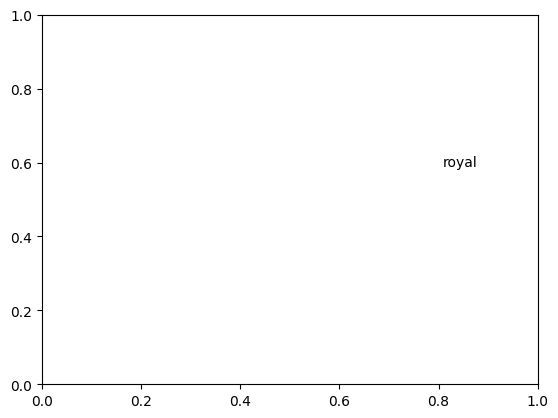

In [140]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for word in words:
    print(word, vectors[word2int[word]][1])
    ax.annotate(word, (vectors[word2int[word]][0],vectors[word2int[word]][1] ))
plt.show()